In [1]:
#import inspect
import os
import matplotlib.pyplot as plt
from plot_results import collect_data, plot_training_curves

from arguments import prepare_finetuning_args, Args
args = prepare_finetuning_args()

# Leggere il file di log
#log_file_path = './output/log_sup.txt'
#log_file_path = './output/log_pretrainTrue.txt'
log_file_path = './output/log_12h.txt'
log_file_path = './output/log_12h_cloudy.txt'
log_file_path = './output/log_CL10.txt'
log_file_path = './output/log_CL10_2596.txt'
log_file_path = './output/log_CL10_2.txt'
log_file_path = './output/log_3342.txt'
log_file_path = './output/log_CL10_cloudy_714.txt'
log_file_path_best = './output/log_medicanes_600.txt'
log_file_path = './output/log_medicanes_600_lr1.txt'
log_file_path = './output/log_medicanes_600_lr2.txt'
log_file_path = './output/log_medicanes_600_lr7.txt'
log_file_path = './output/log_medicanes_600_lr9.txt'


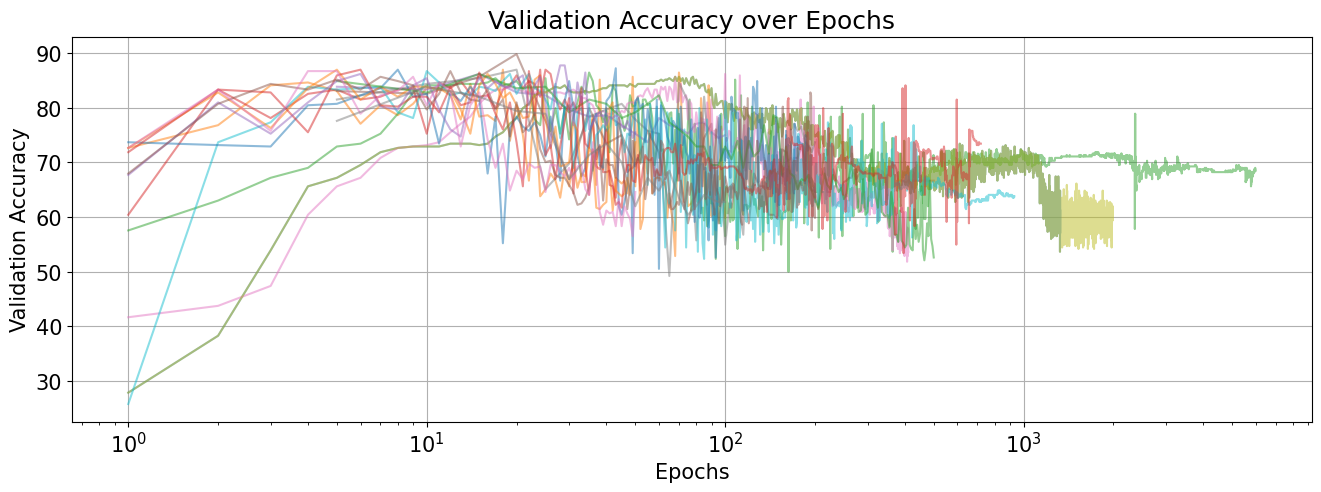

In [28]:
files = os.listdir('./output')
log_files = [f for f in files if f.startswith('log_') and f.endswith('.txt')]
log_medicanes = [f for f in log_files if 'medicanes' in f]

plt.figure(figsize=(16, 5))
for l in log_medicanes:
        # take validation loss in each file
        data = collect_data(os.path.join('./output', l))
        val_epochs, val_losses, val_accs = data[4], data[5], data[6]
        plt.plot(val_epochs, val_accs, label=l, alpha=0.5)

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.grid()
plt.xscale('log')
#plt.yscale('log')
plt.savefig("all_accuracies")
plt.show()


# Plot loss

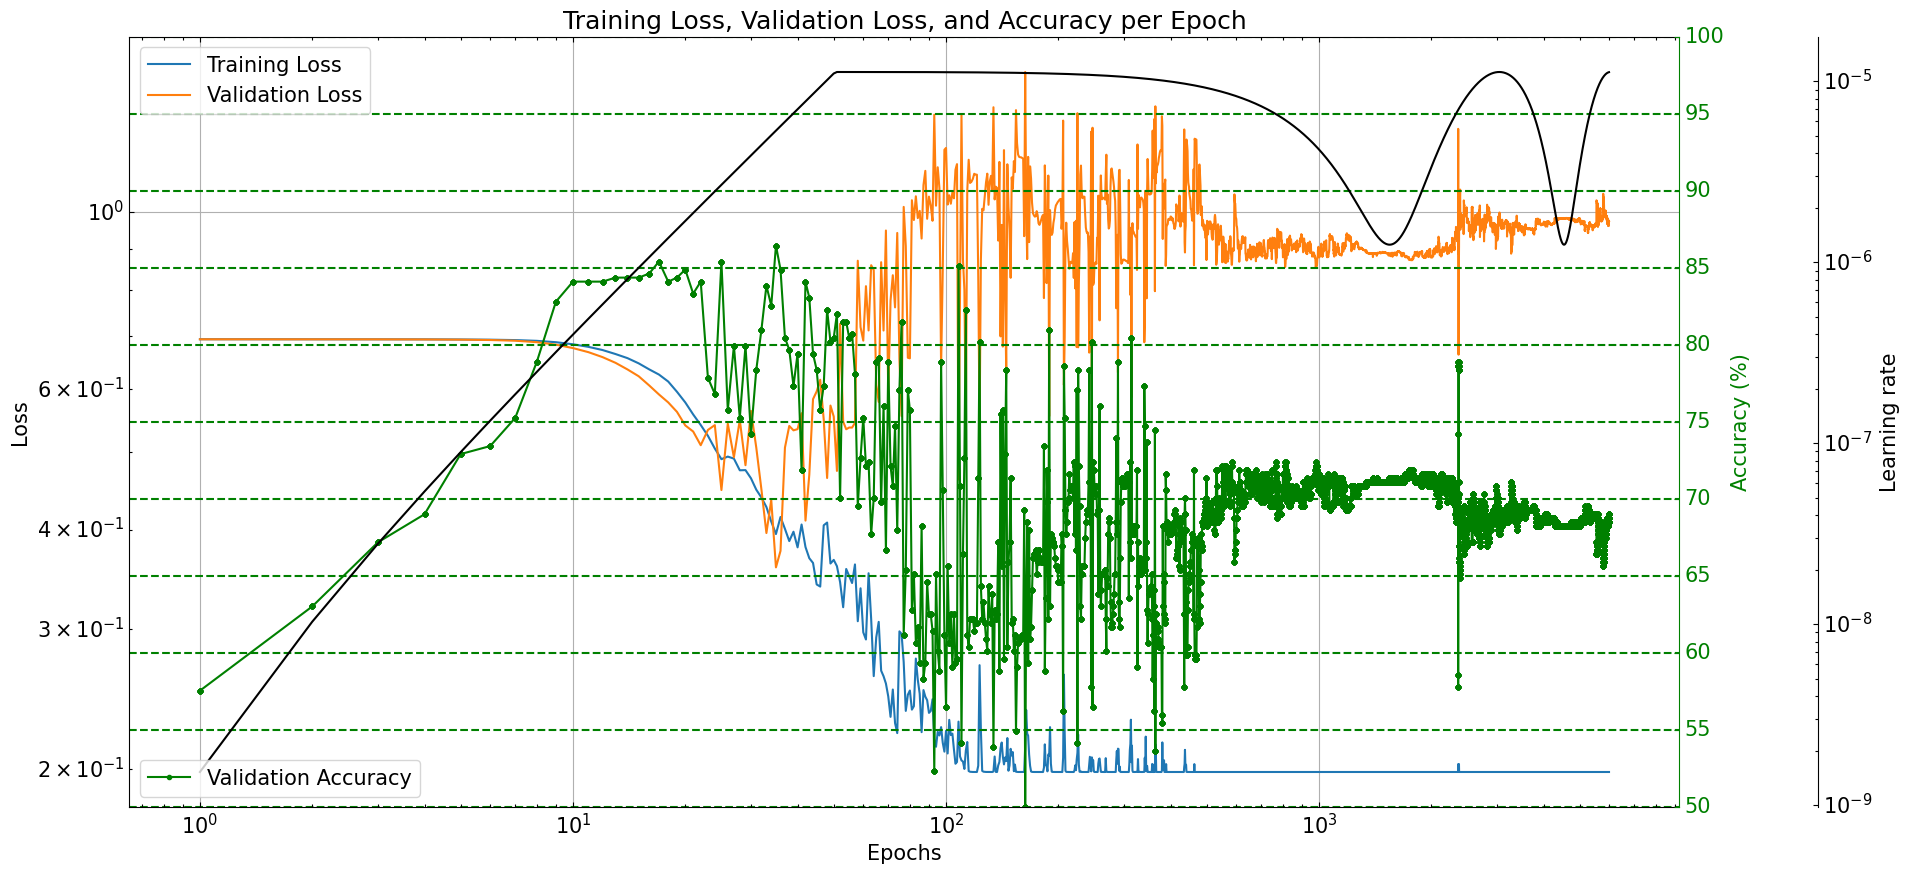

In [9]:
plot_training_curves(collect_data('./output/log_medicanes_600_15Kepochs.txt'),plot_file_name="600Medicanes_long.png")

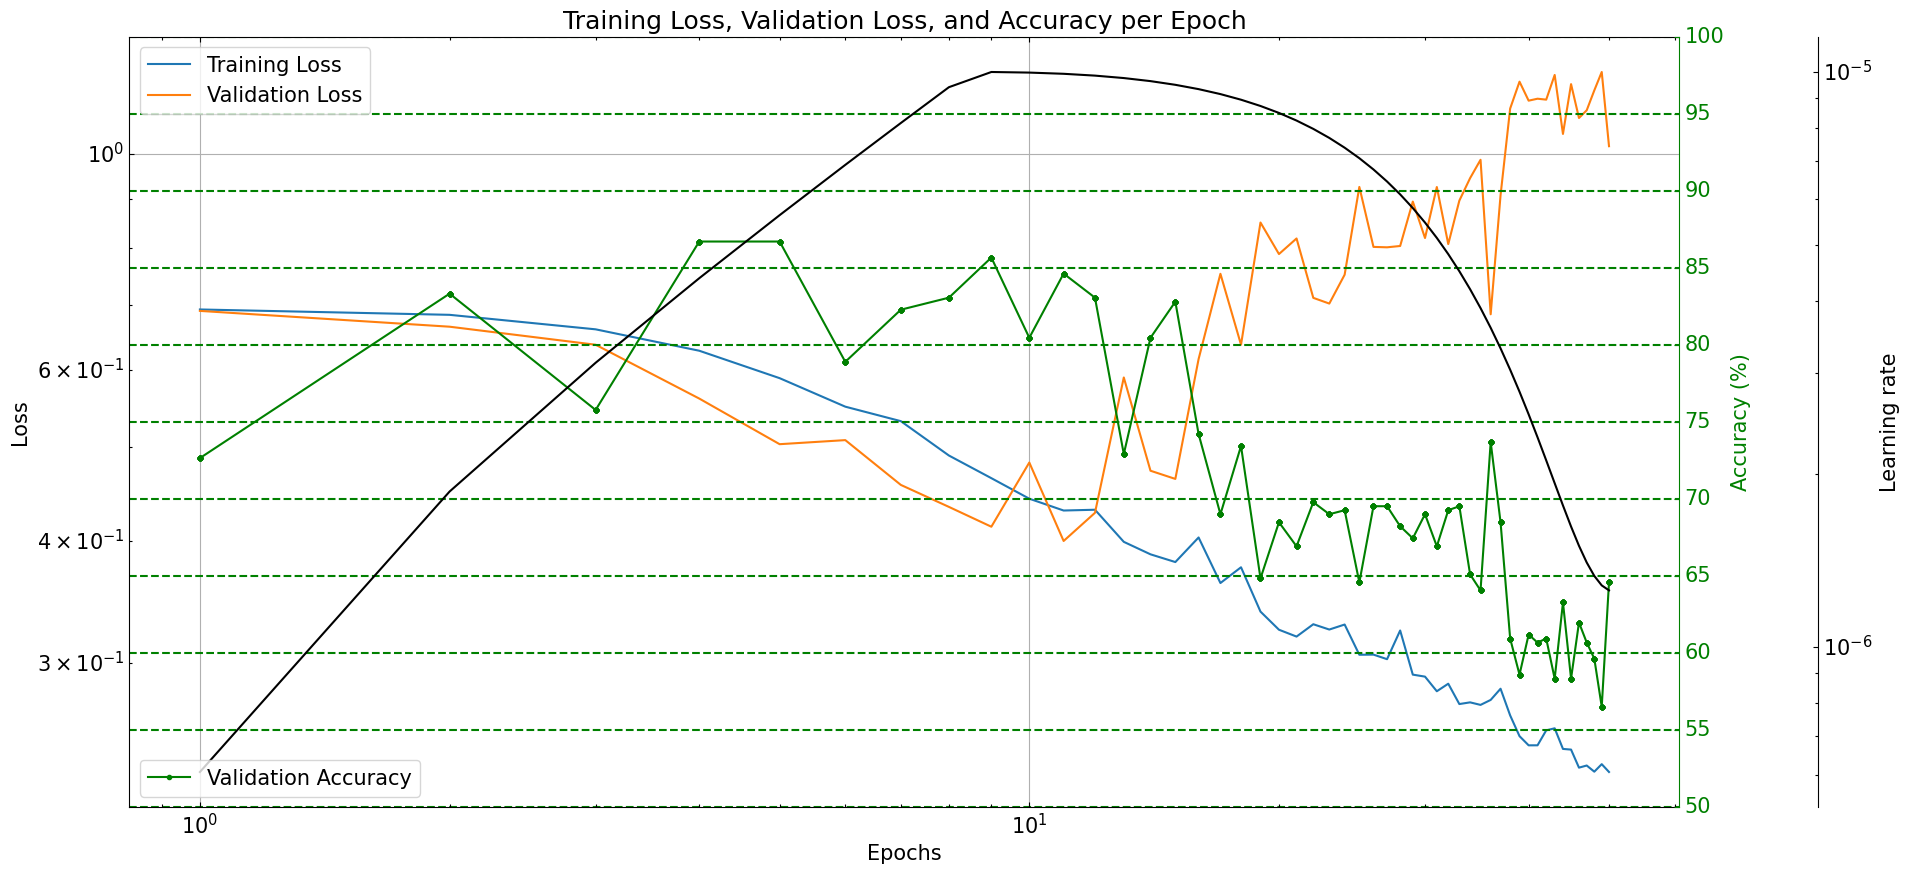

In [10]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr16.txt'),plot_file_name="600Medicanes_lr16.png")

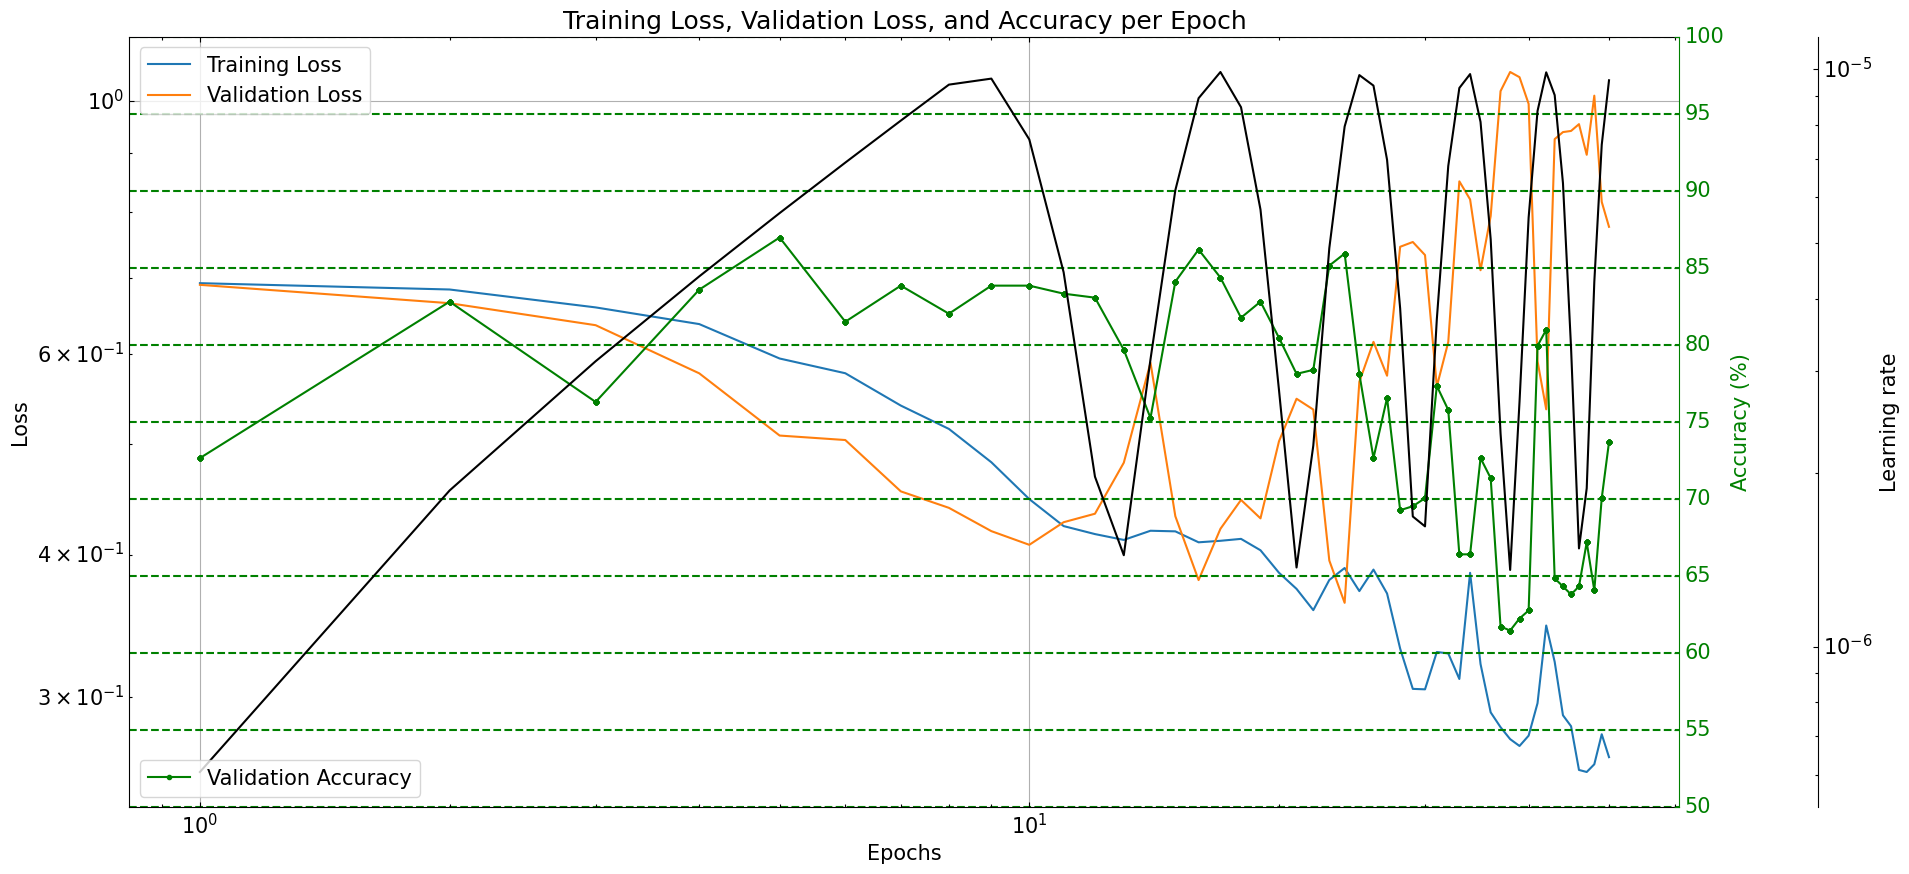

In [11]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr15.txt'),plot_file_name="600Medicanes_lr15.png")

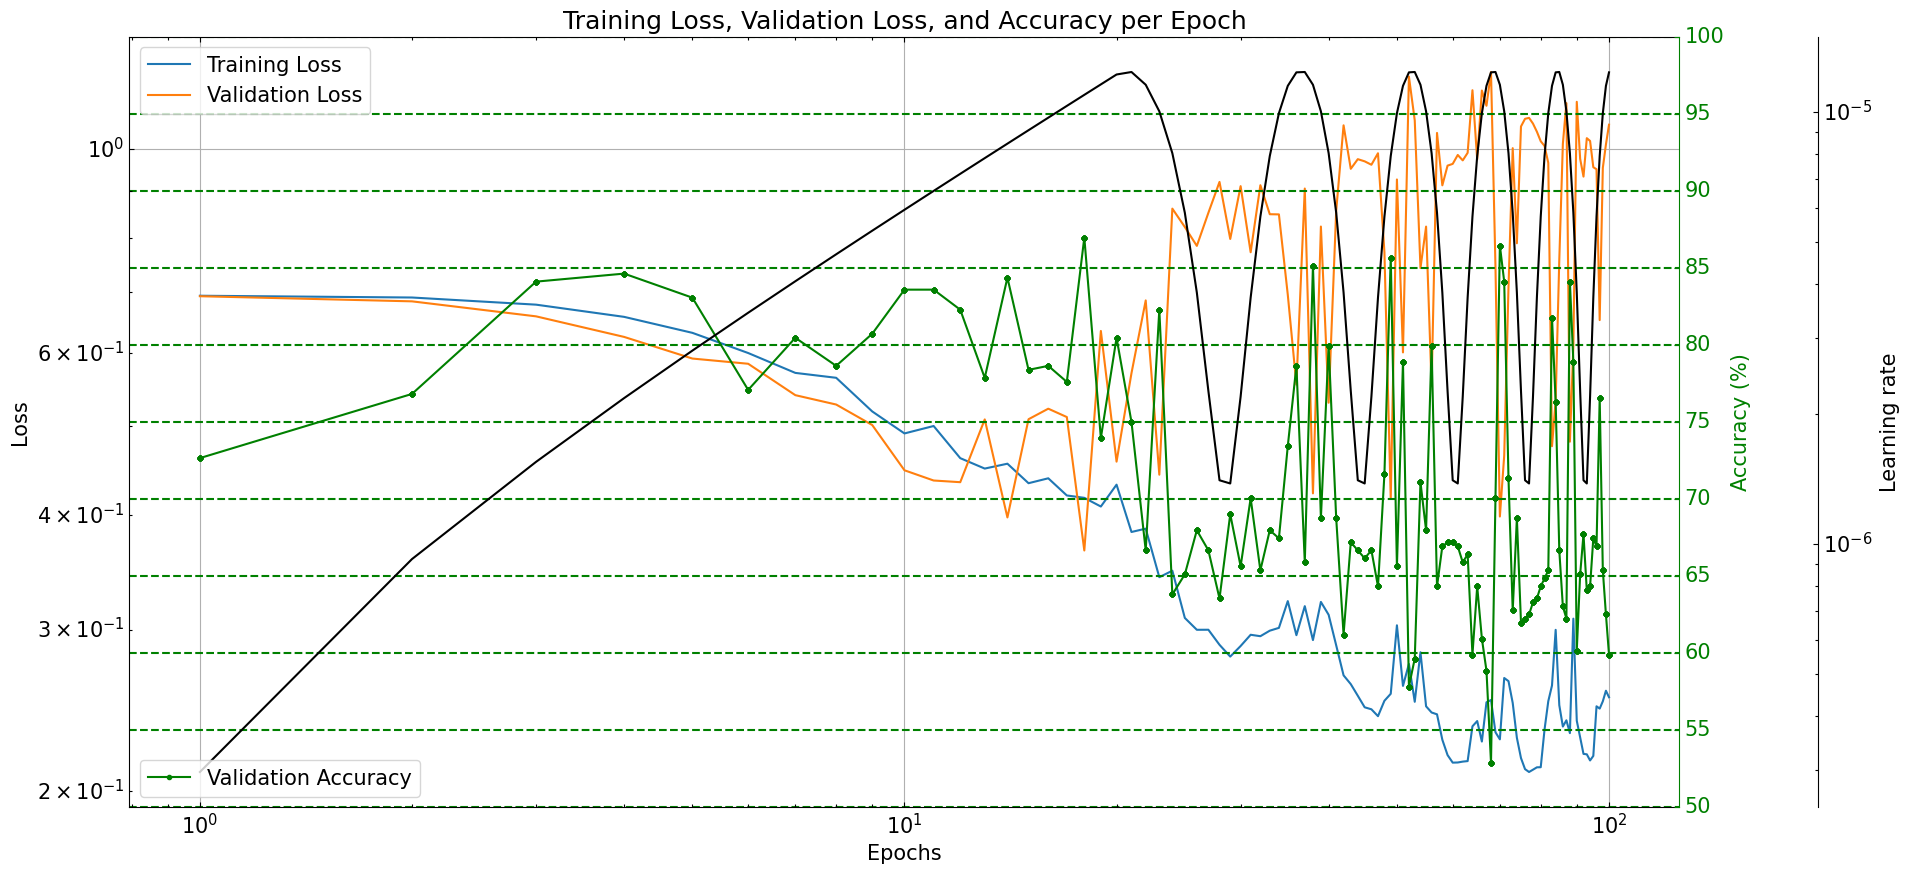

In [12]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr14.txt'),plot_file_name="600Medicanes_lr14.png")

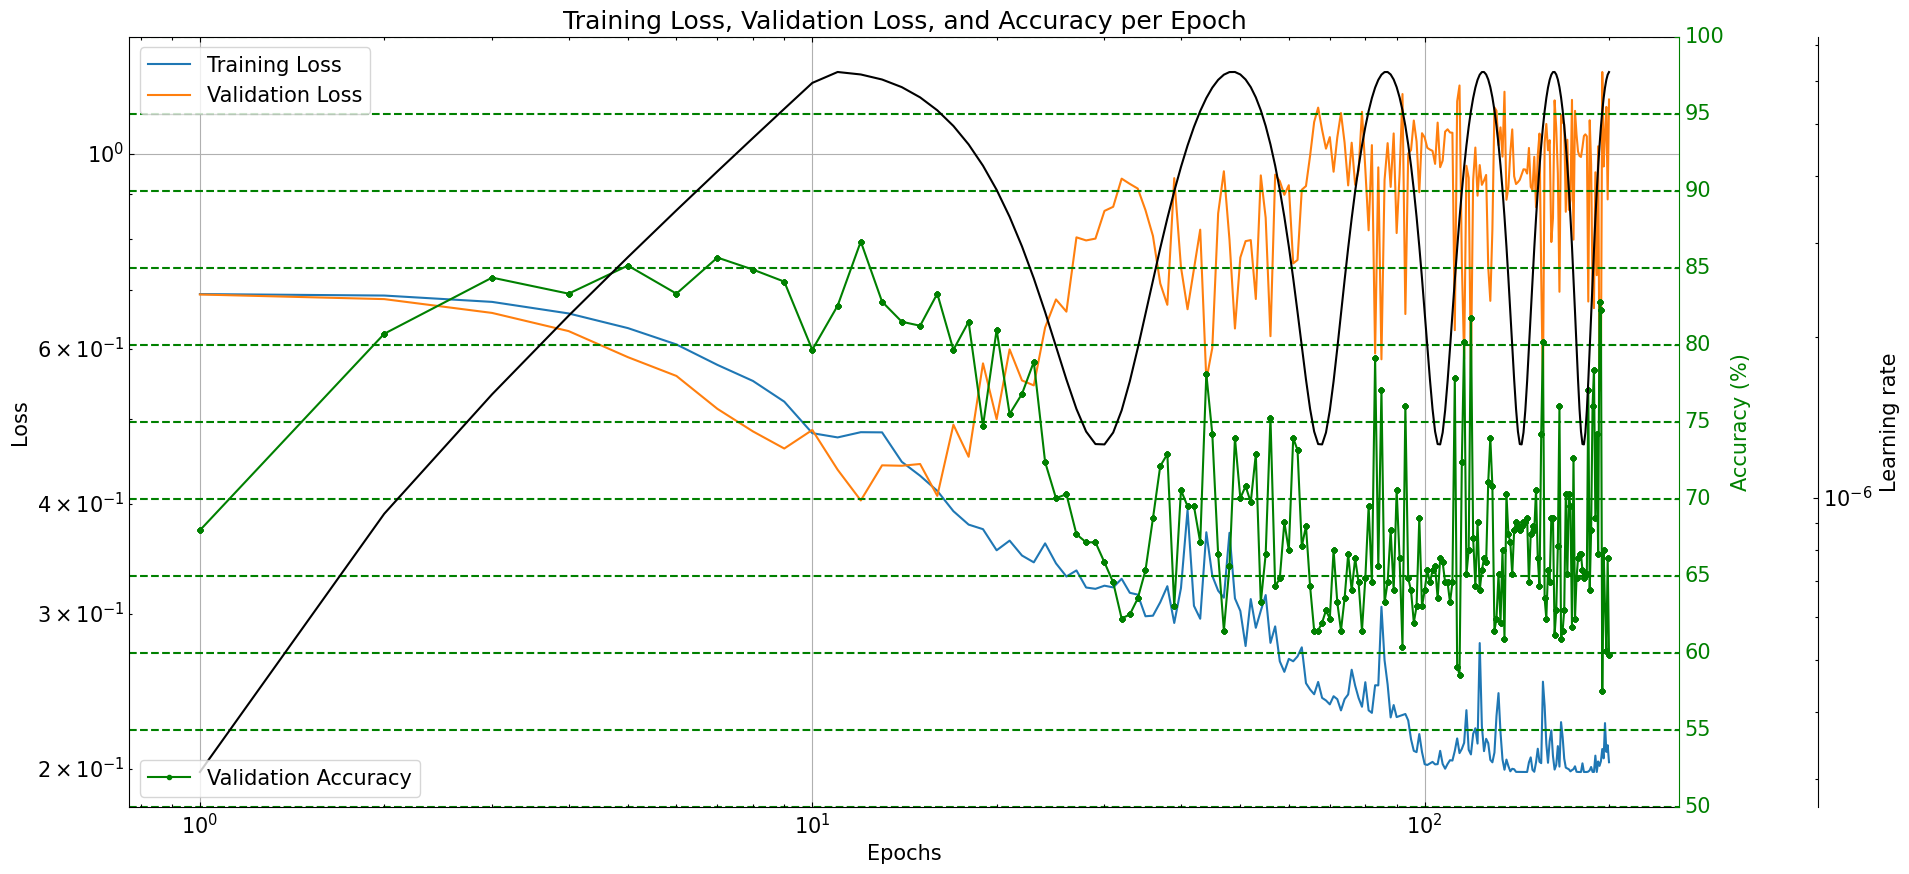

In [13]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr13.txt'),plot_file_name="600Medicanes_lr13.png")

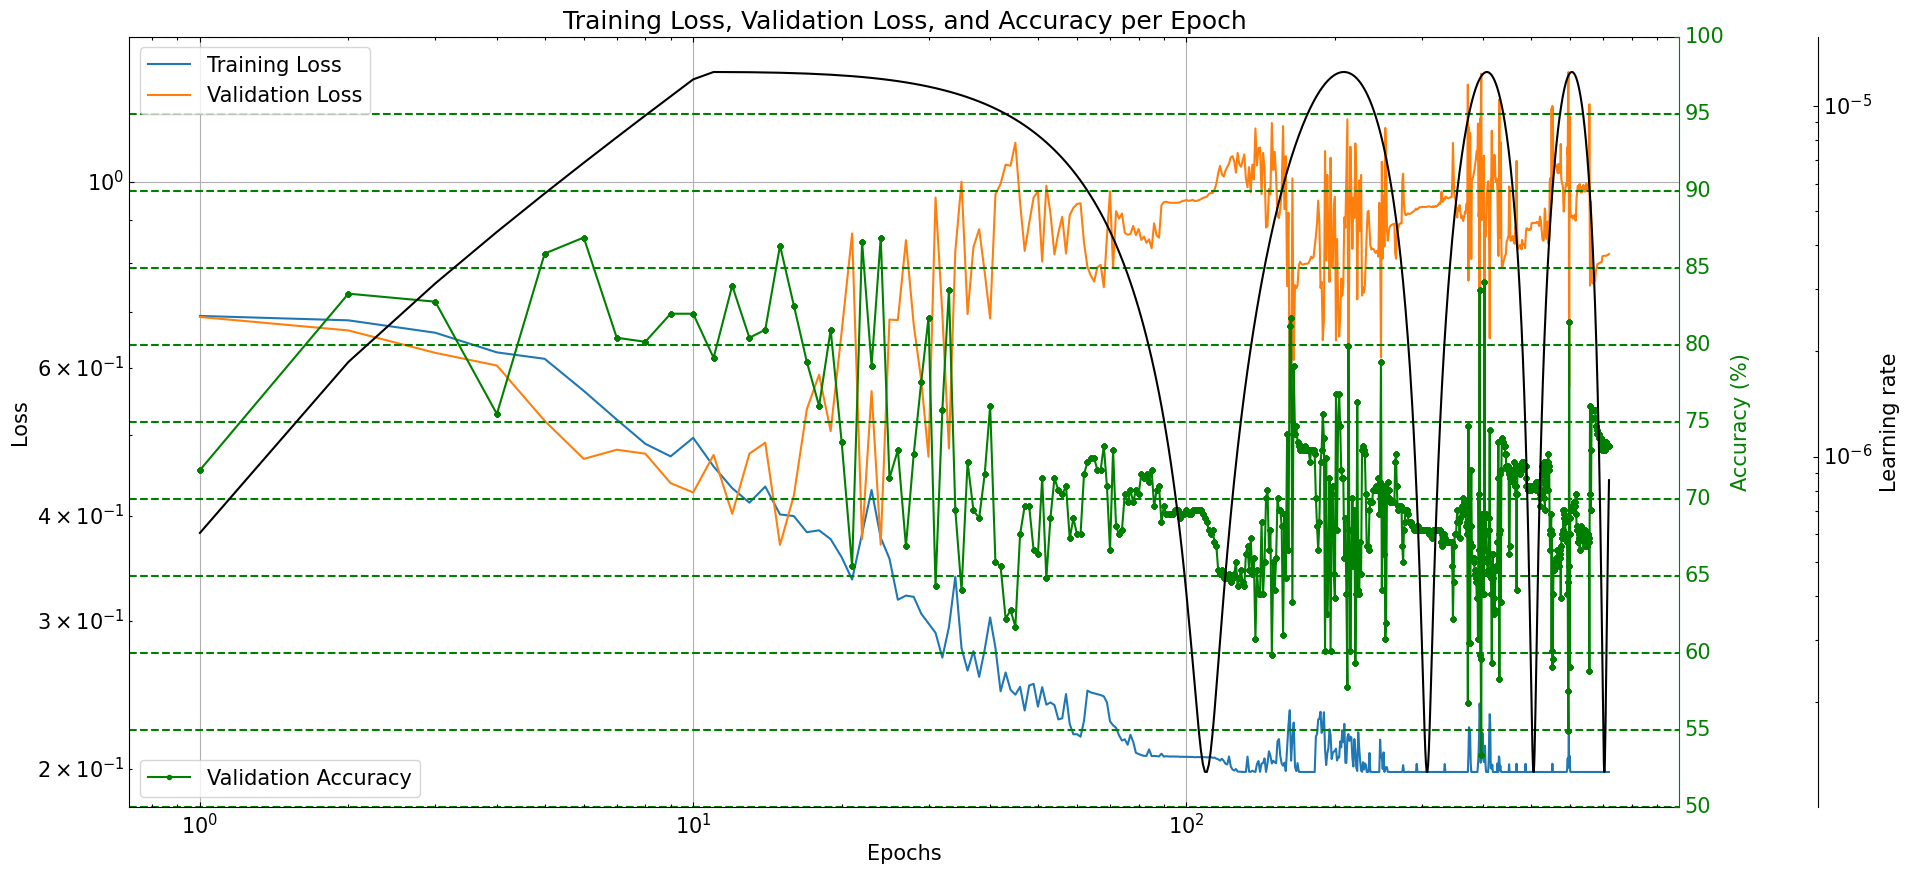

In [14]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr12.txt'),plot_file_name="600Medicanes_lr12.png")

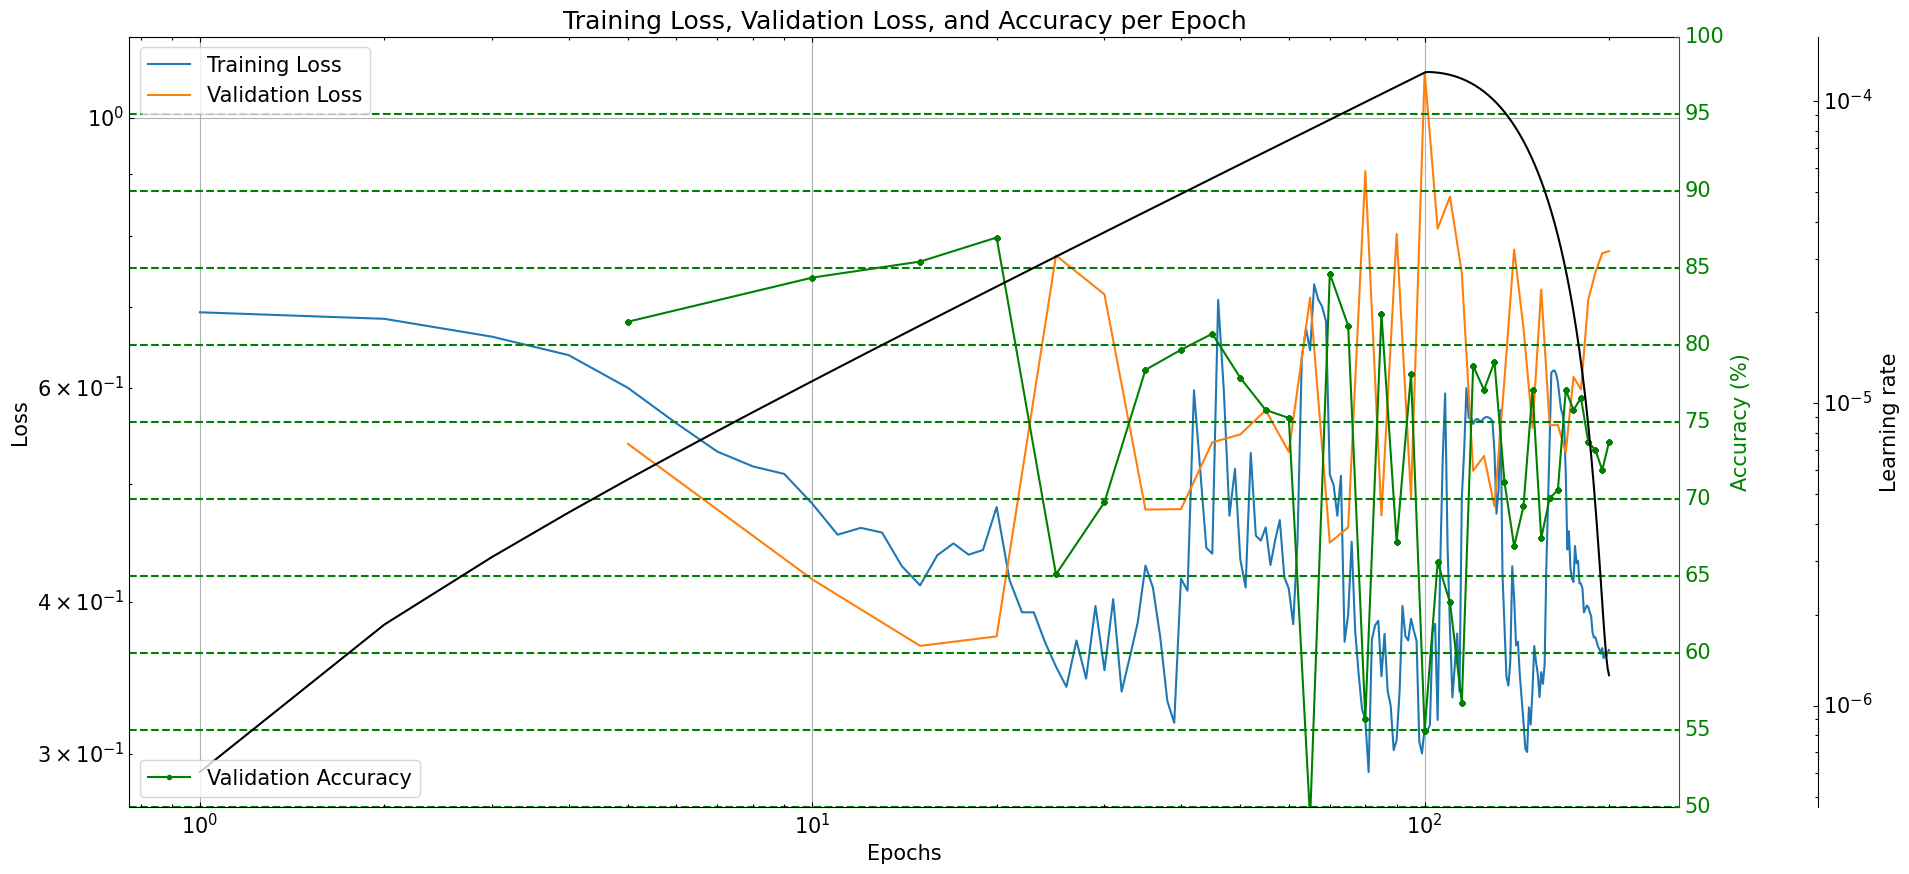

In [15]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr11.txt'),plot_file_name="600Medicanes_lr11.png")

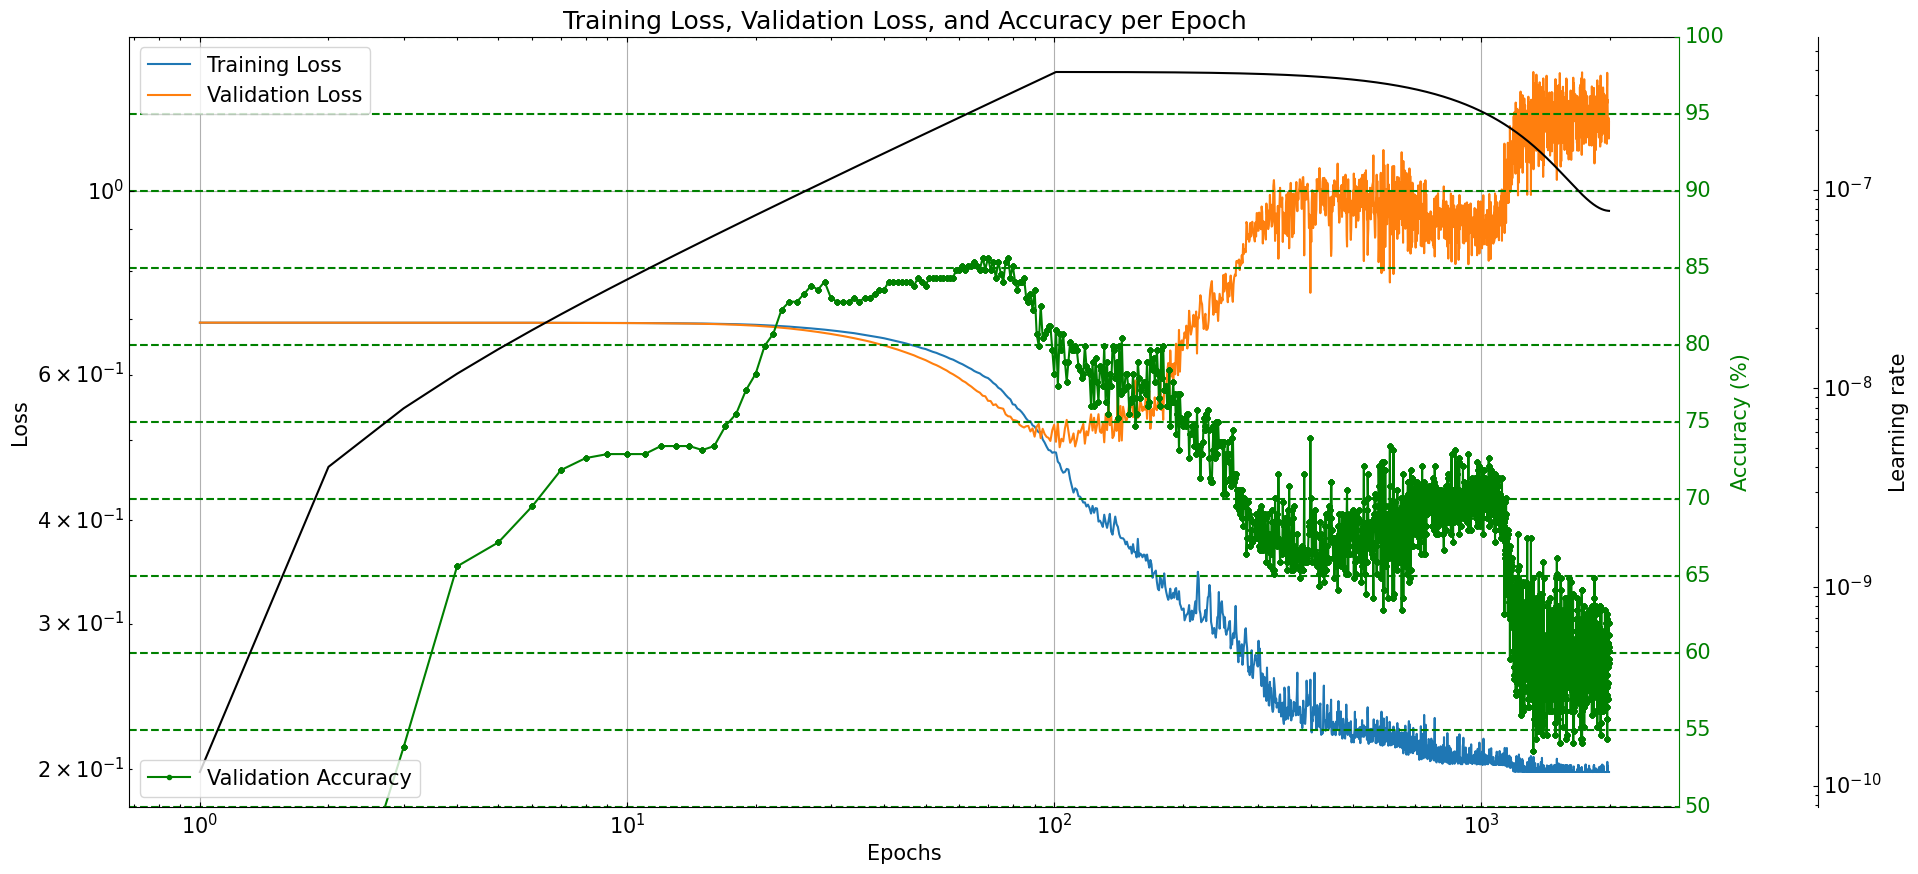

In [16]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr10.txt'),plot_file_name="600Medicanes_lr10.png")

### altri

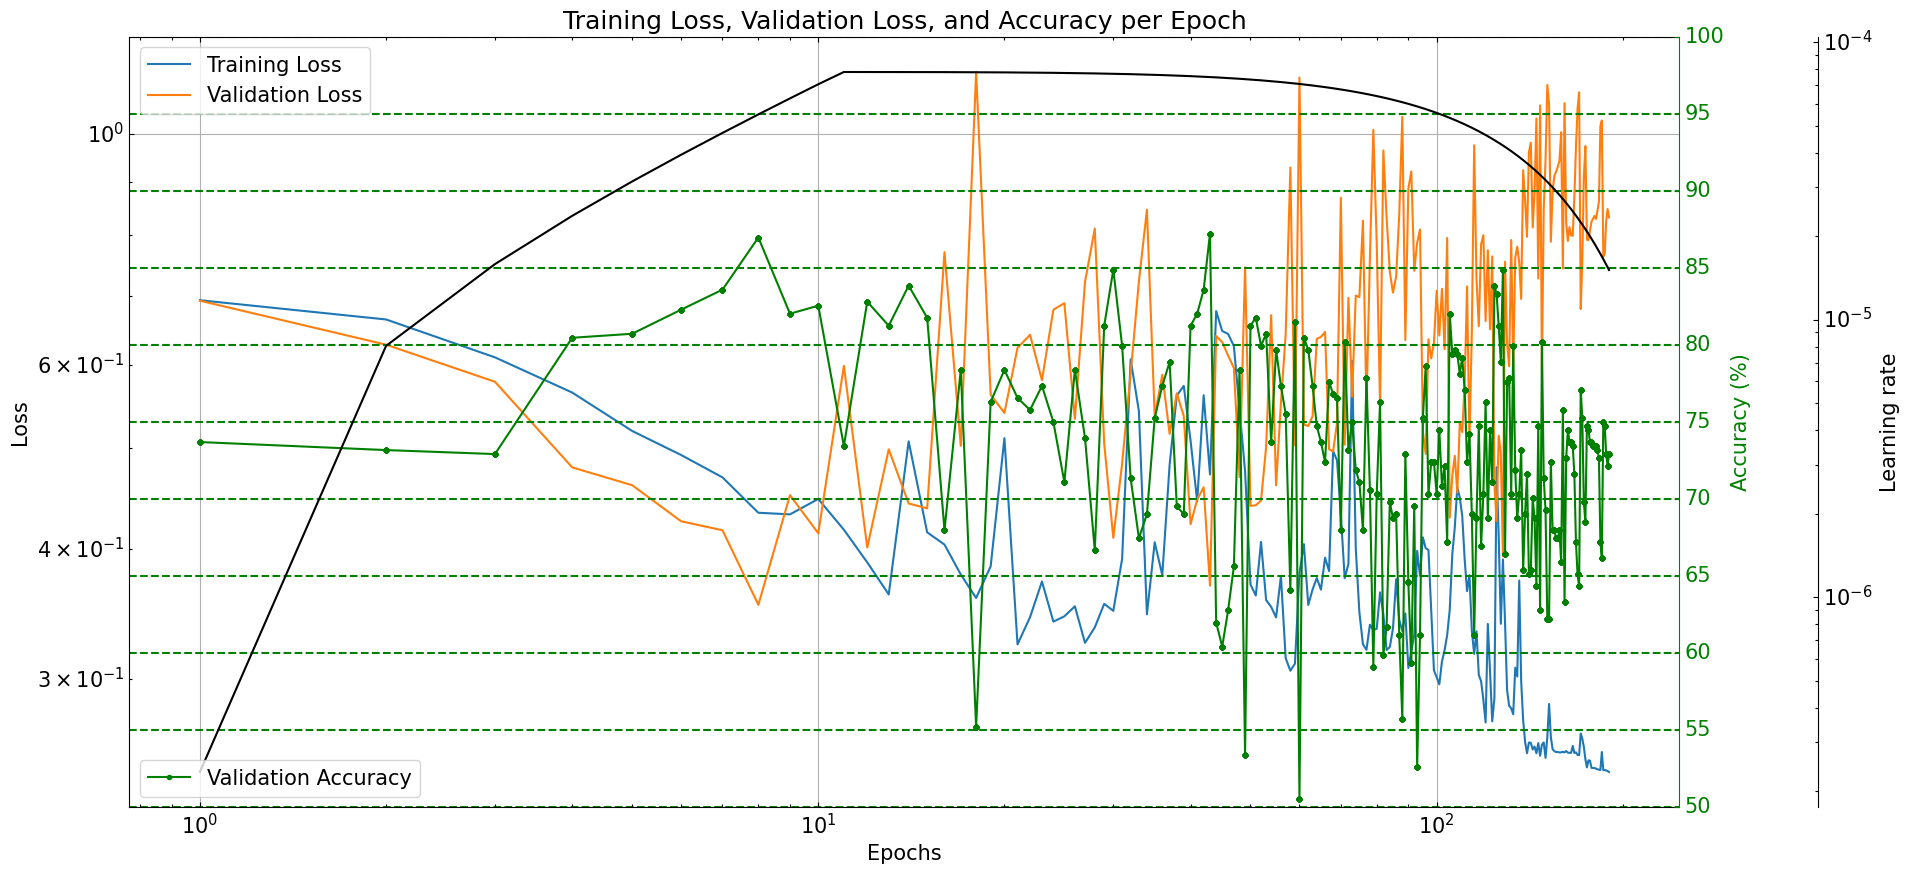

In [17]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr6.txt'),plot_file_name="600Medicanes_lr6.png")

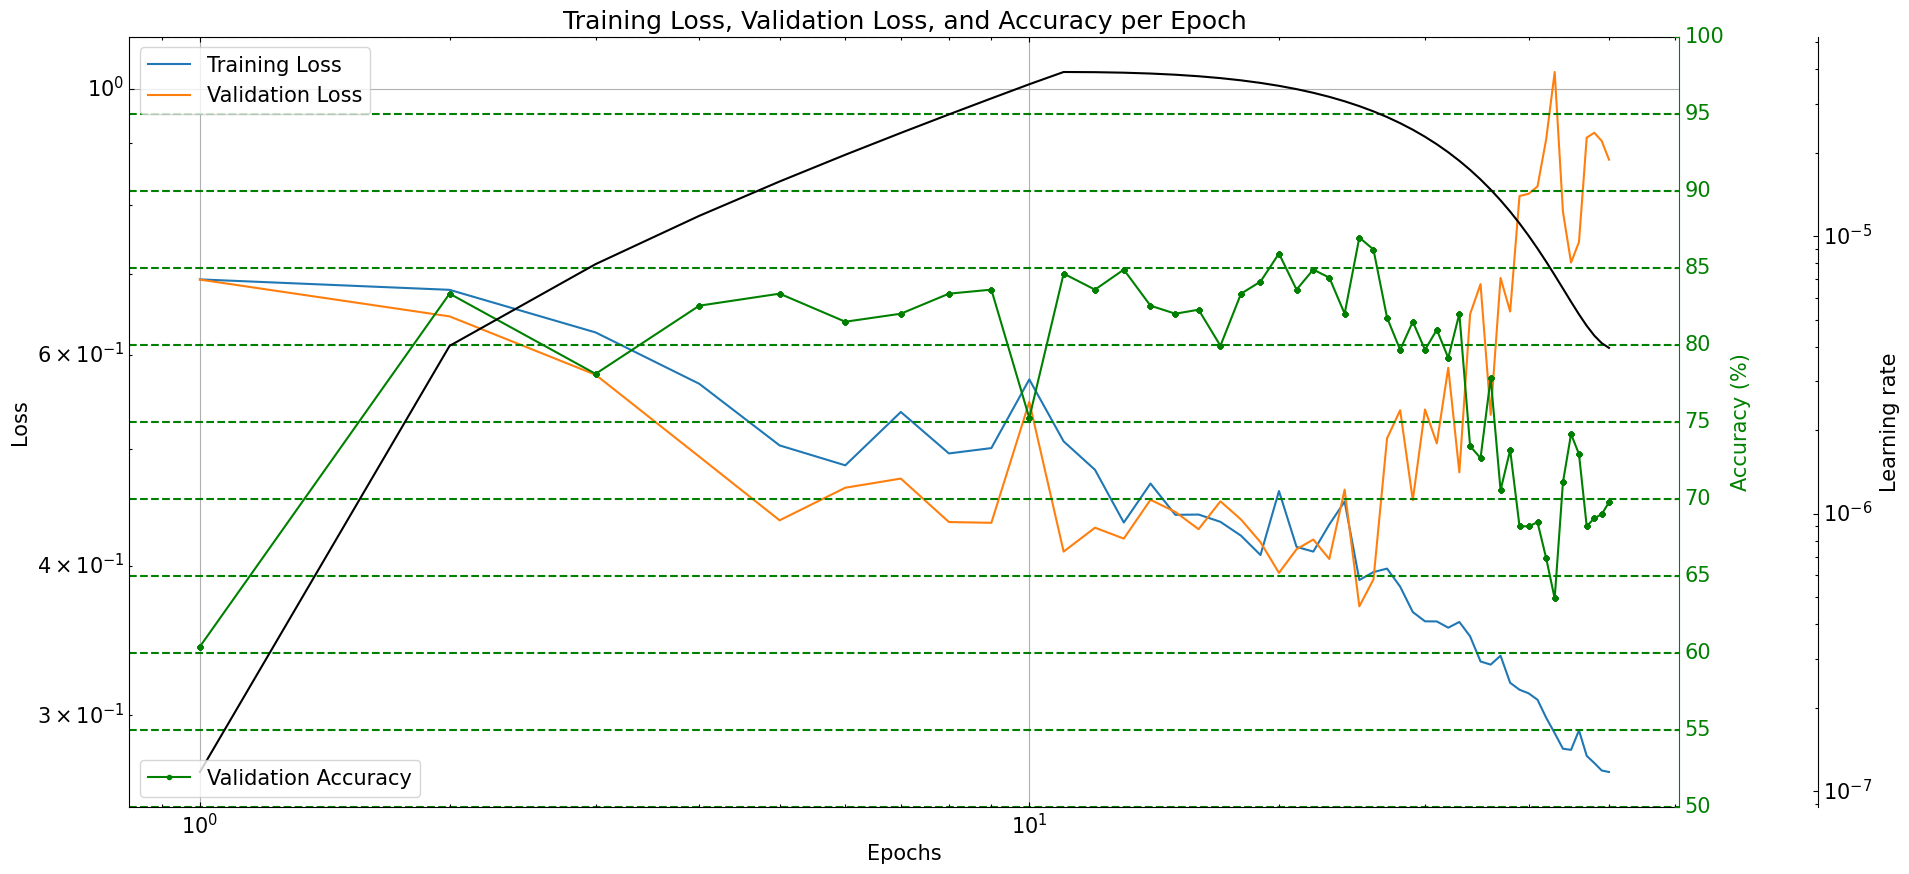

In [18]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr5.txt'), plot_file_name="600Medicanes_lr5.png")

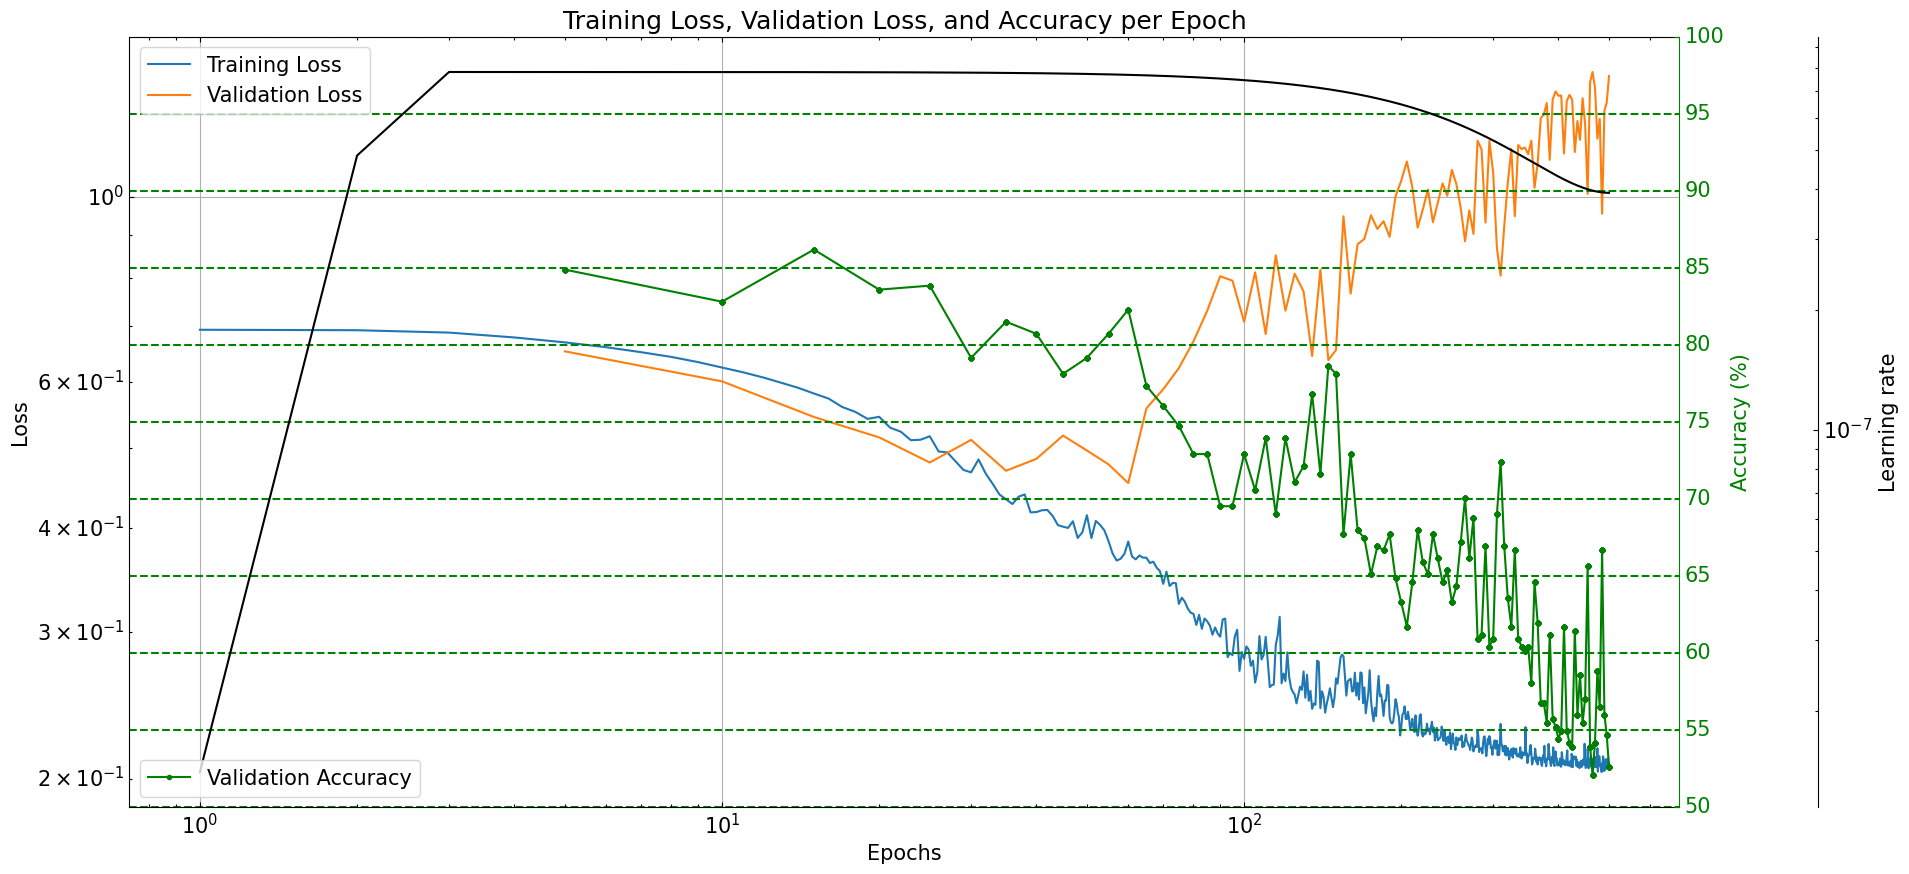

In [27]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr1.txt'),plot_file_name="600Medicanes_lr1.png") 

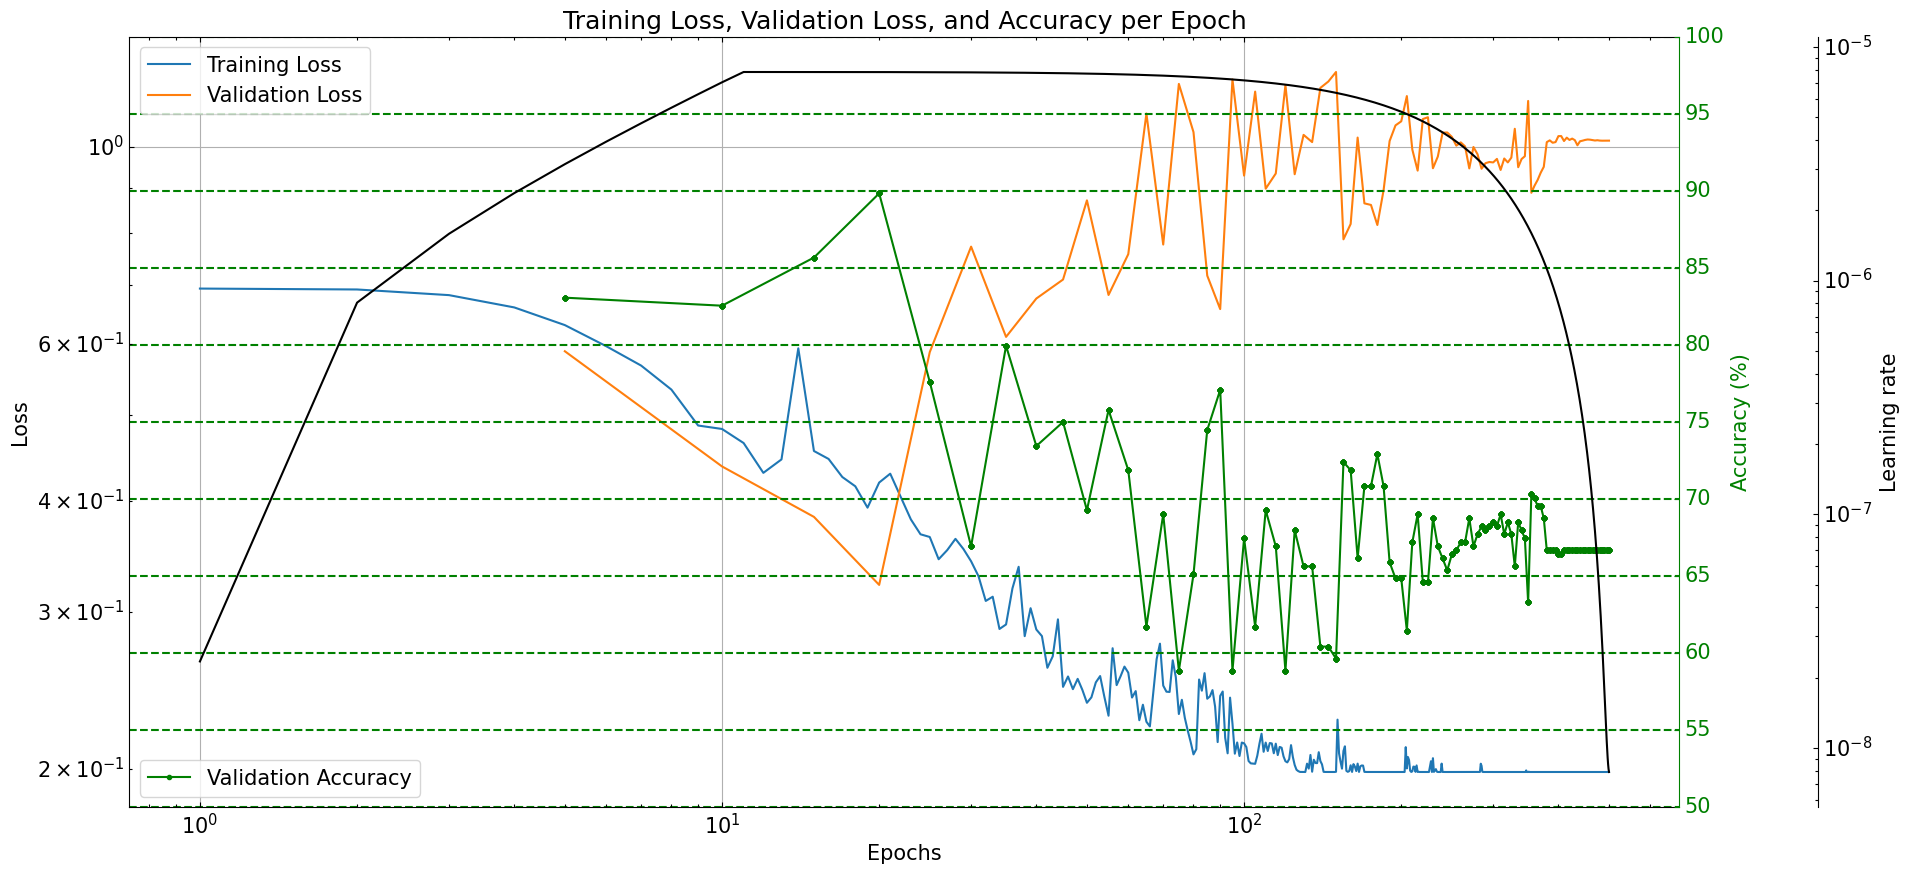

In [25]:
plot_training_curves(collect_data('./output/log_medicanes_600.txt'),plot_file_name="loss_medicanes_only_90.png") 

### old

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

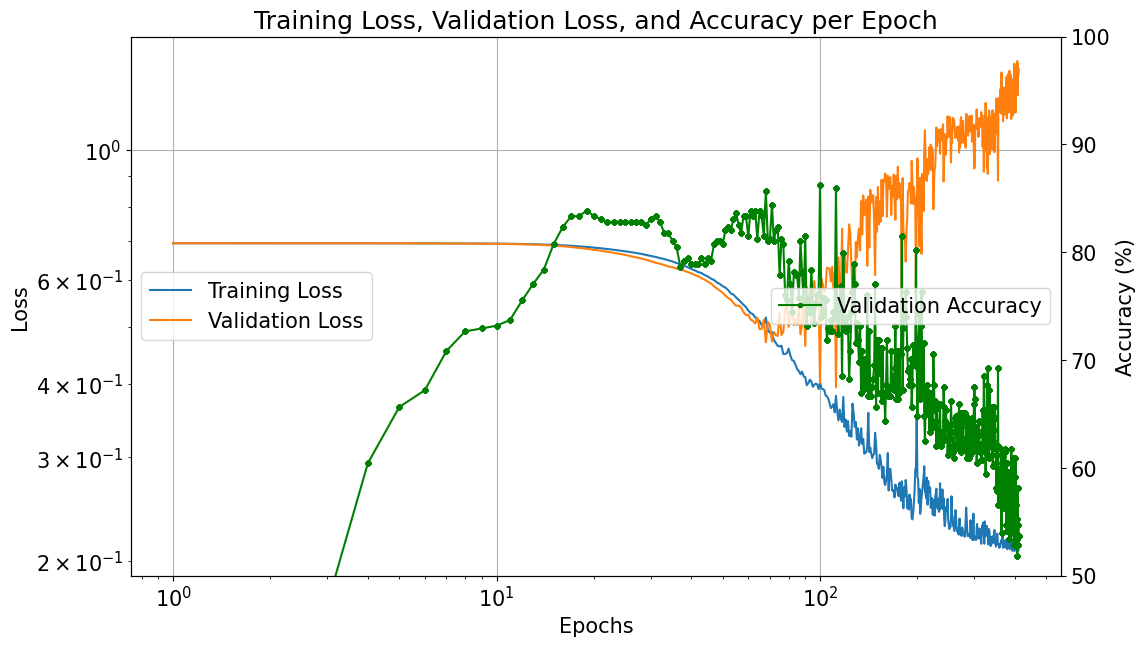

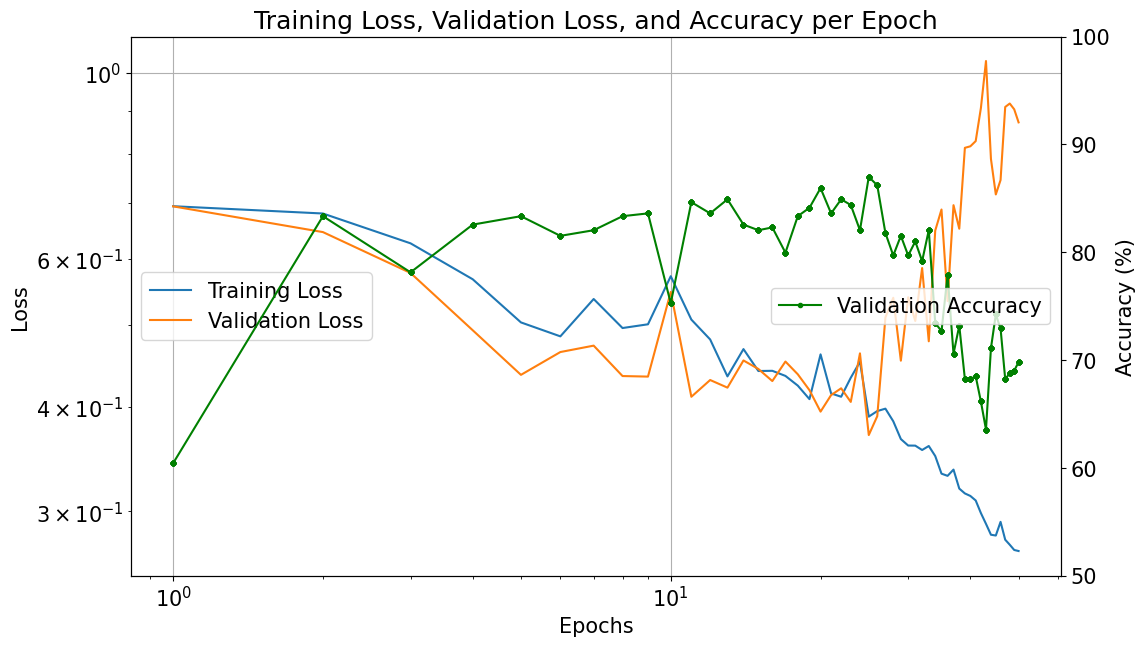

In [ ]:

#plt.show()

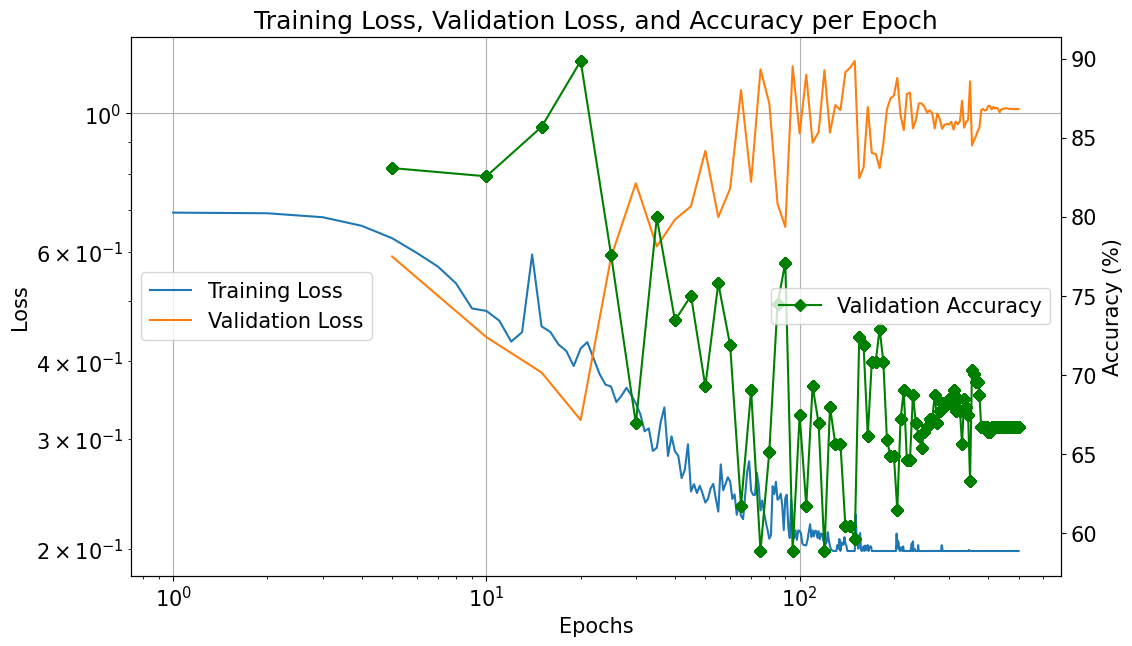

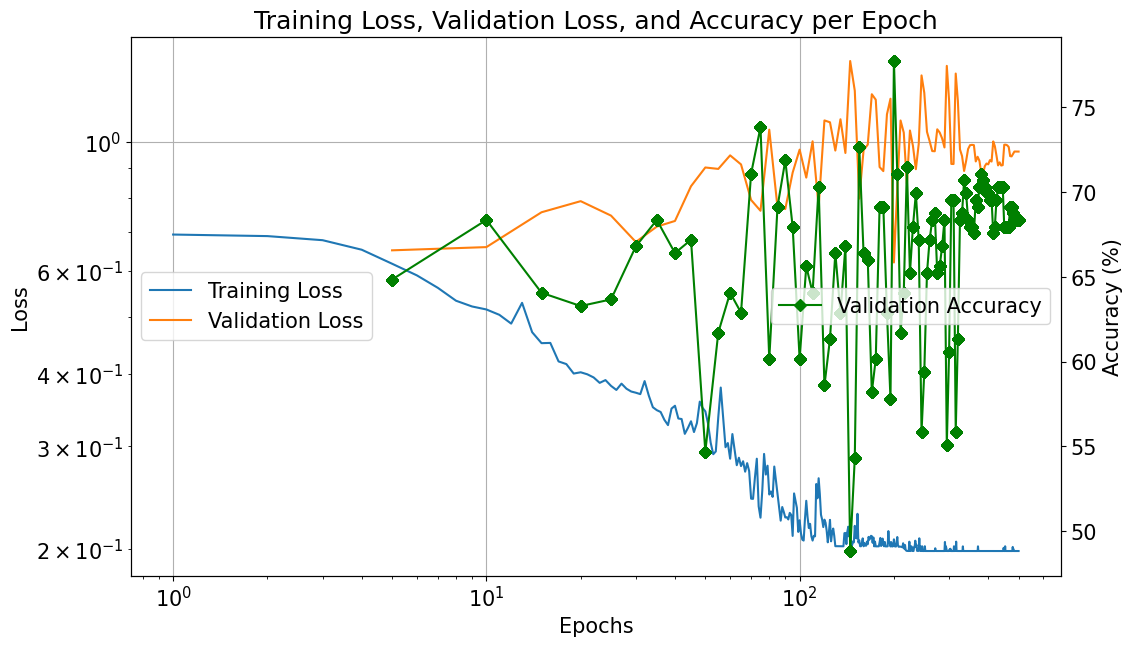

In [5]:
2*5000/60/60

2.7777777777777777

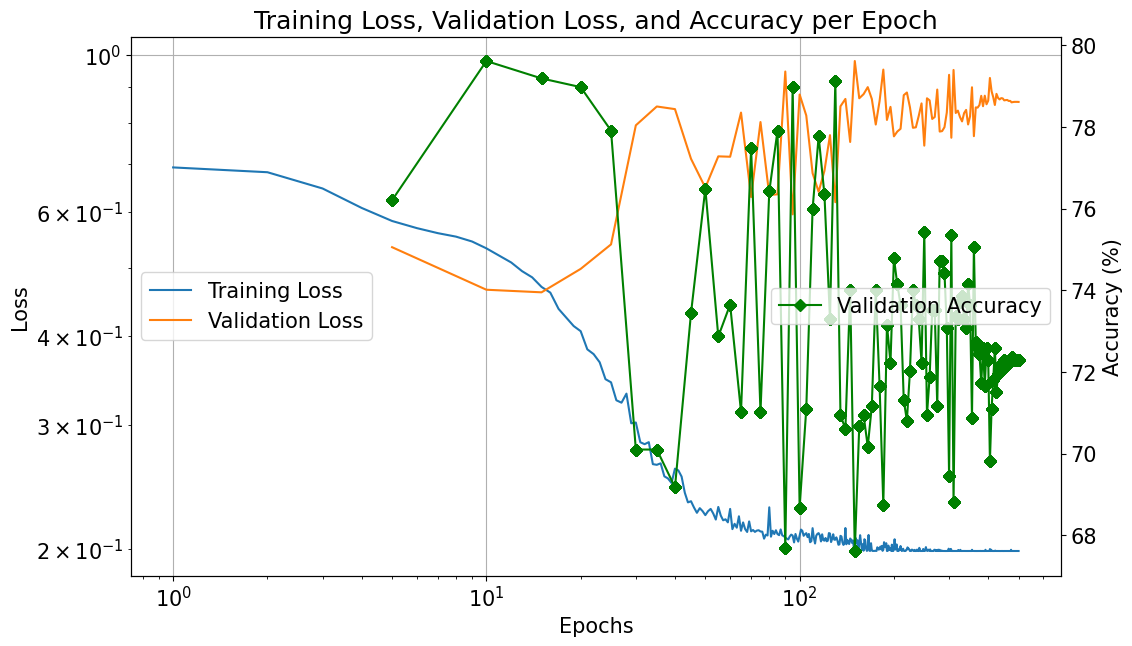

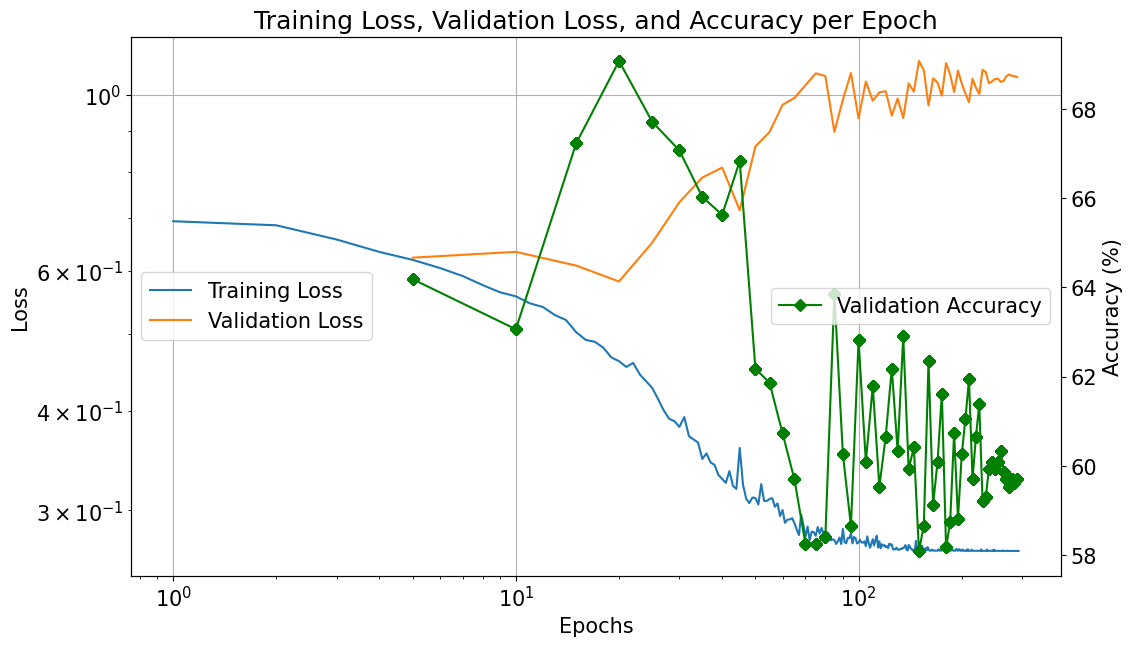

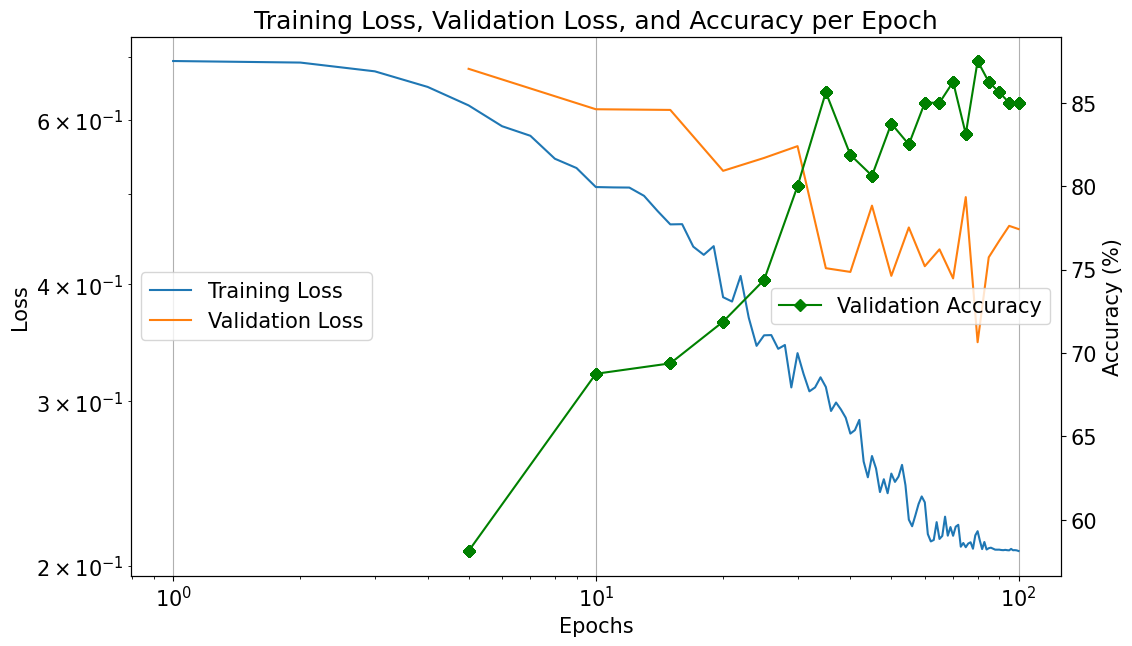

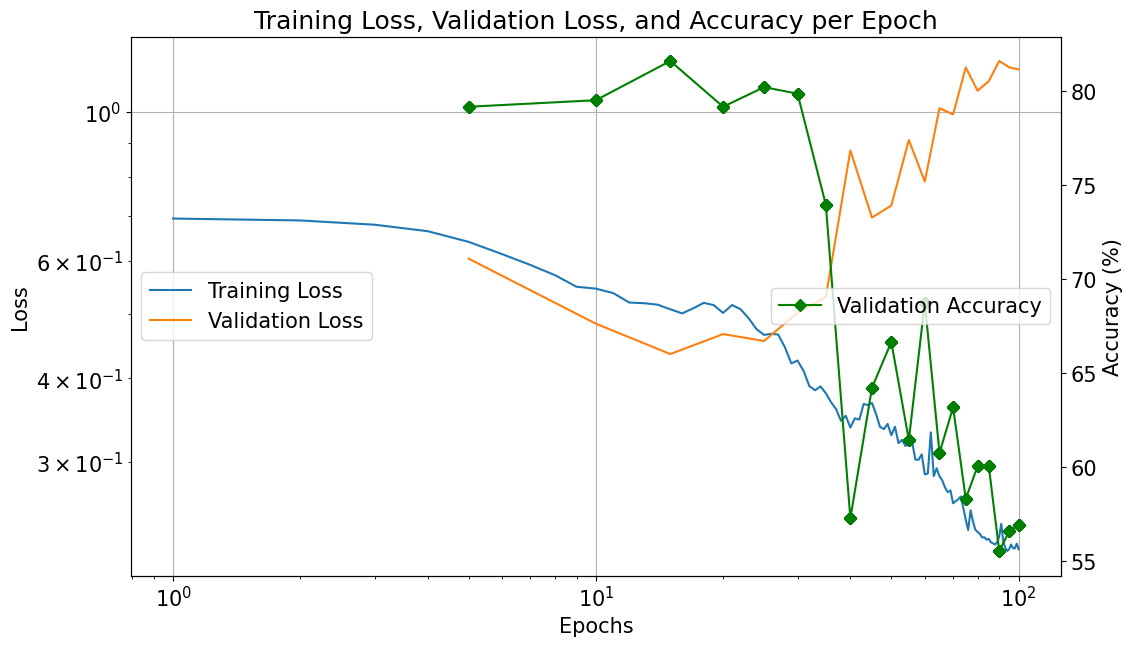

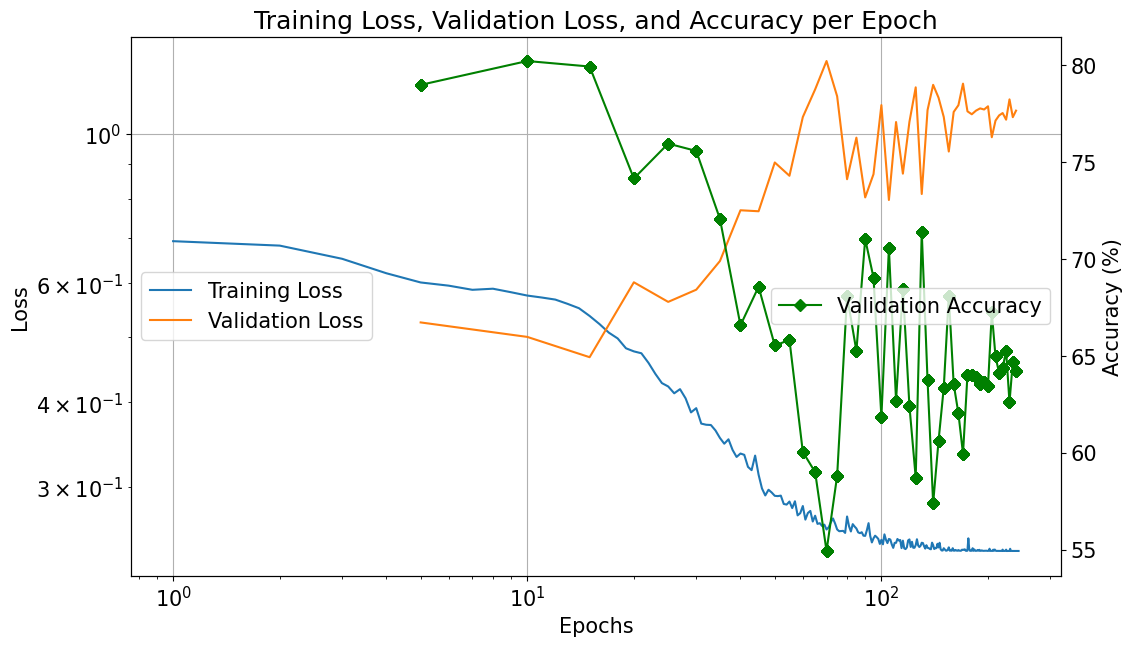

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

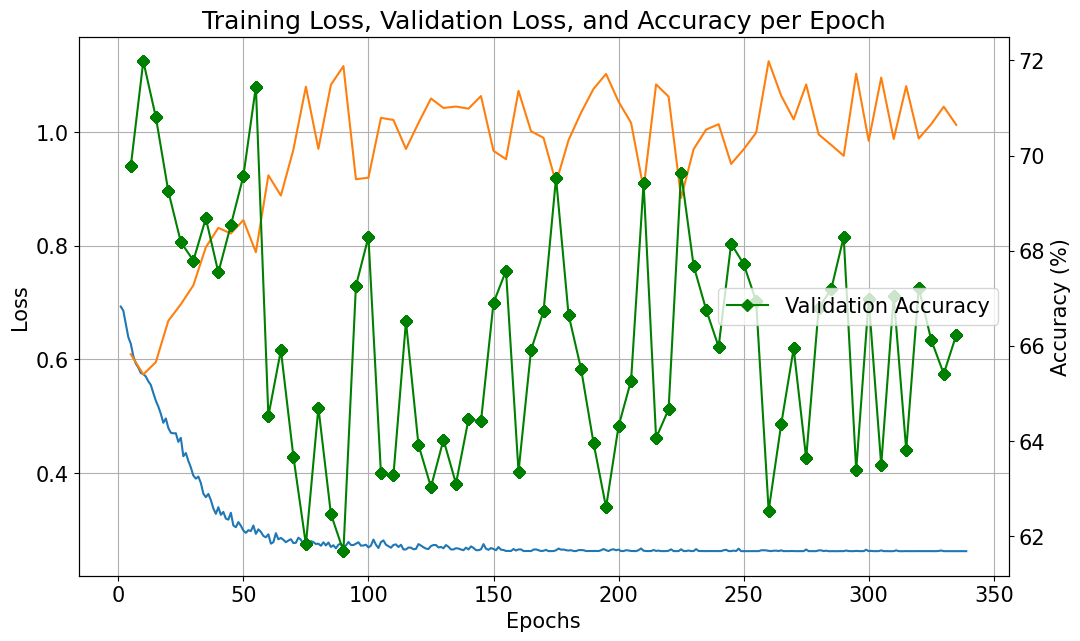

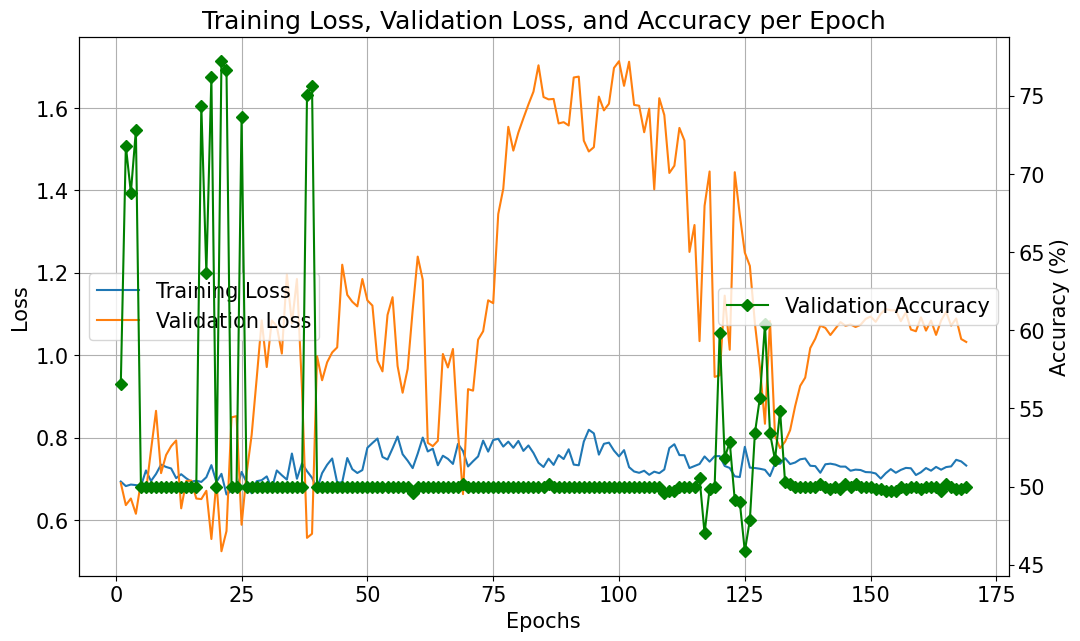

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

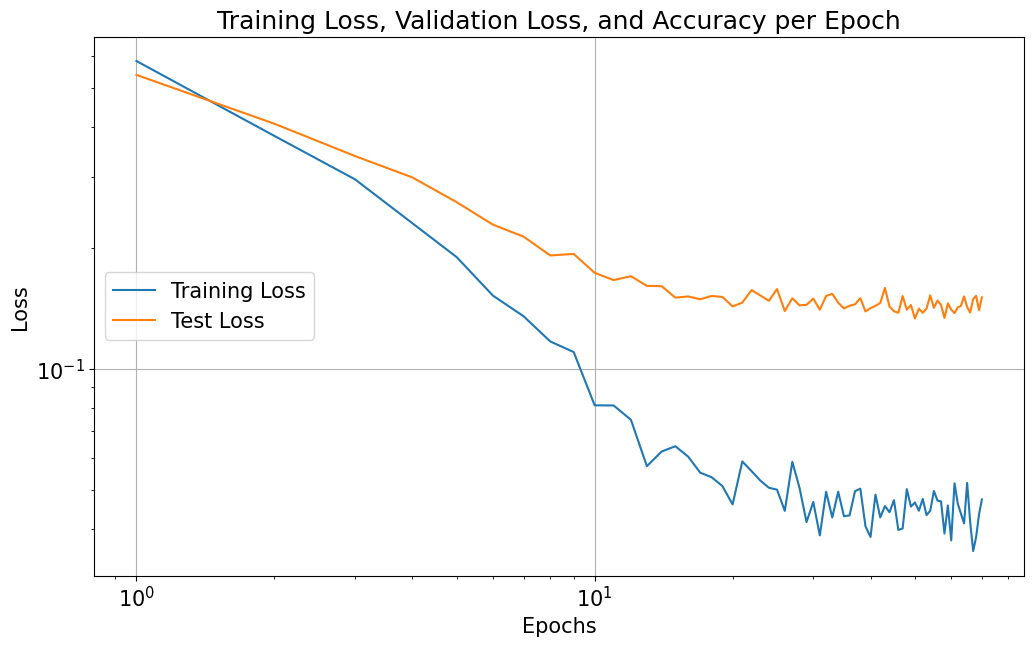

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

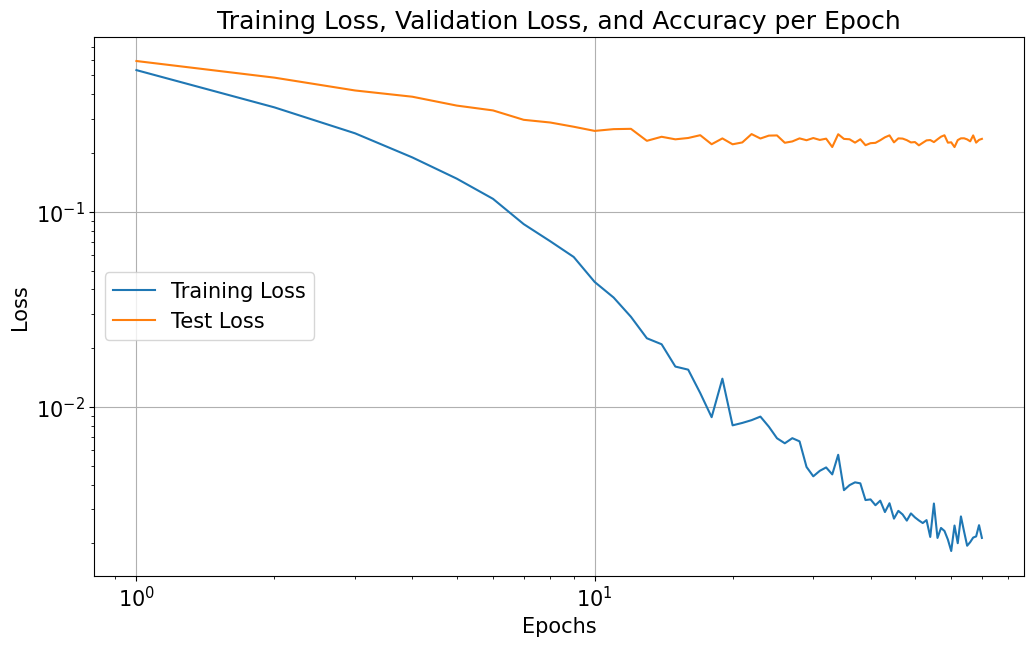

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

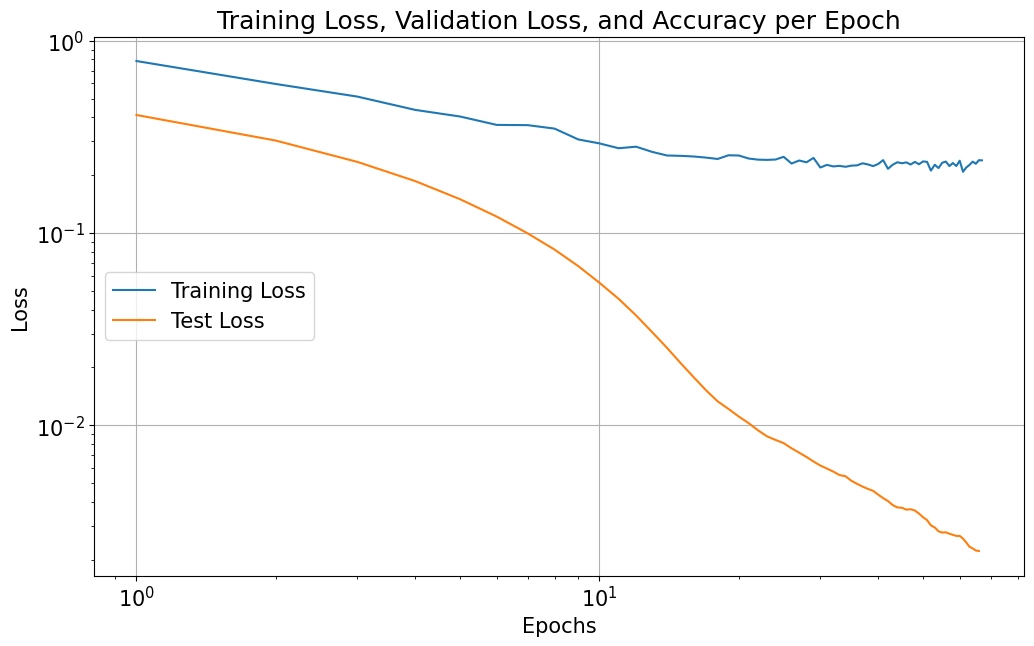

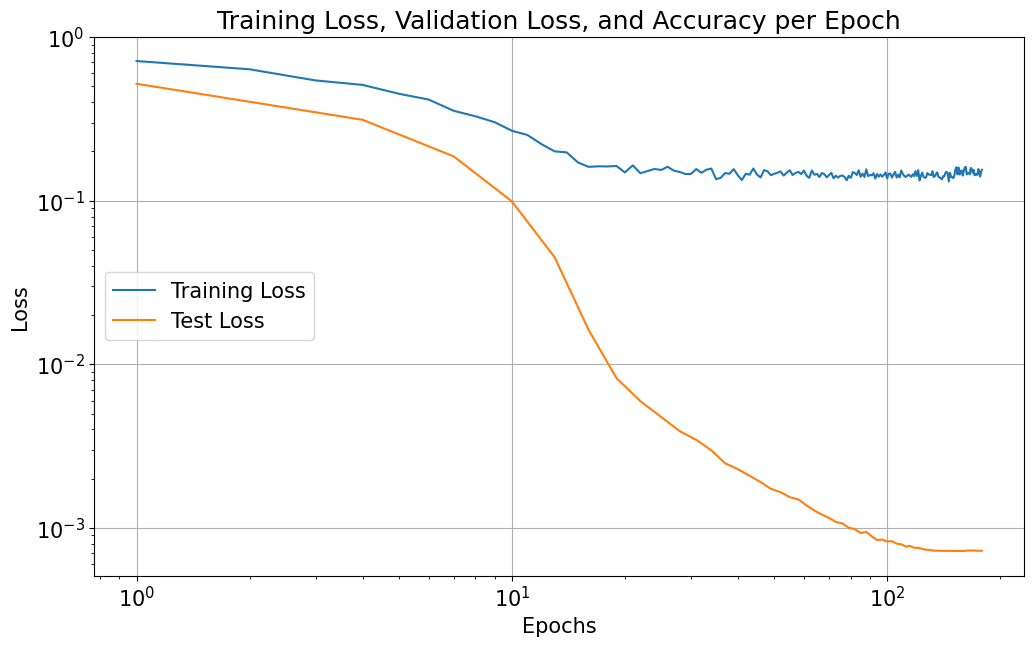

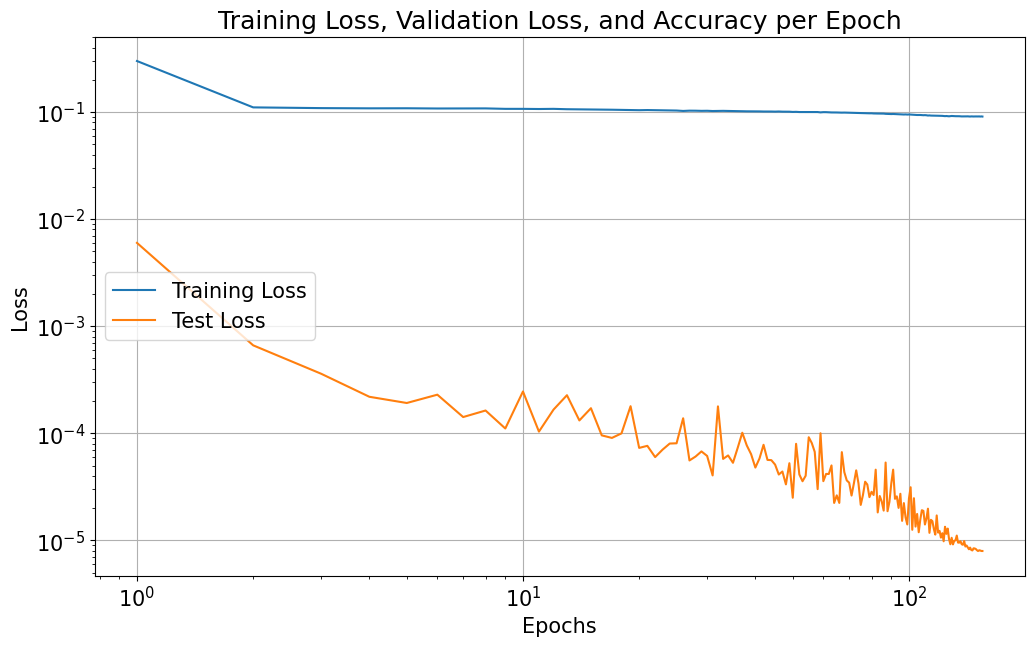

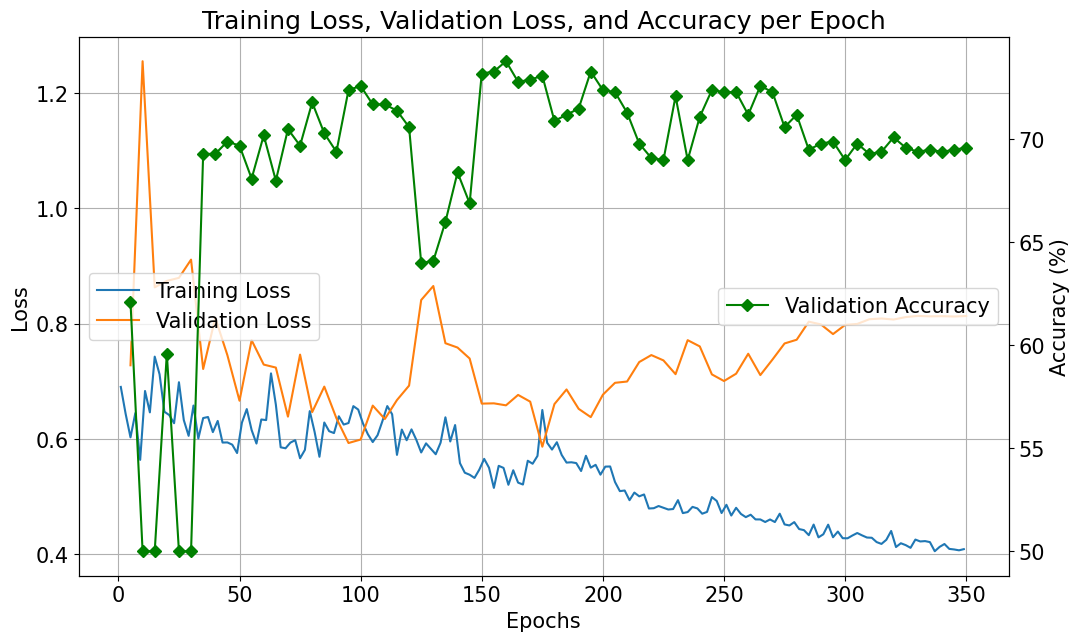

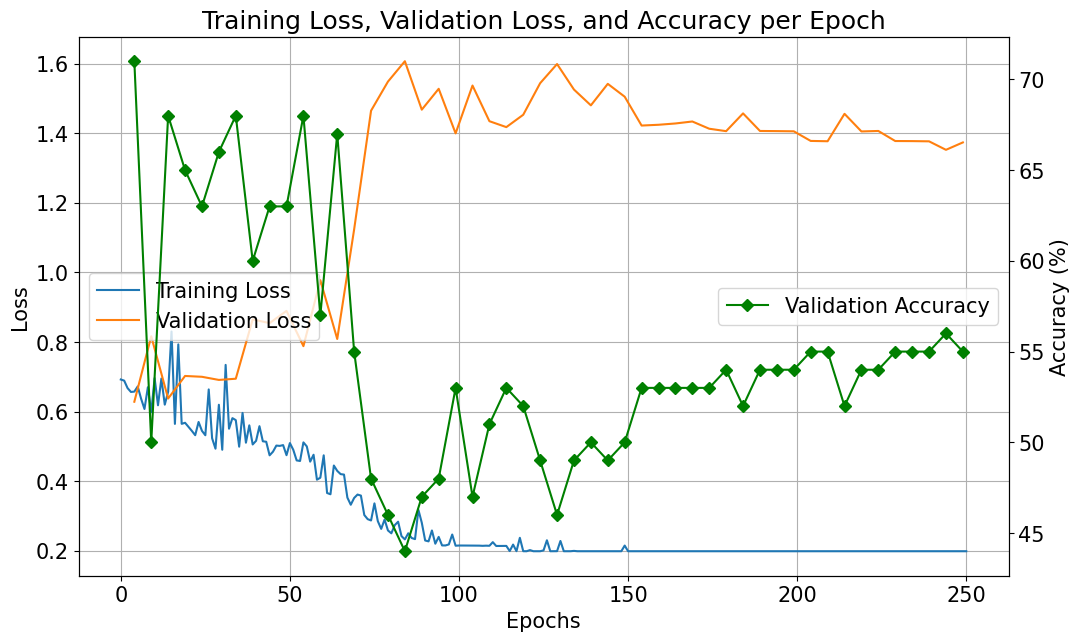

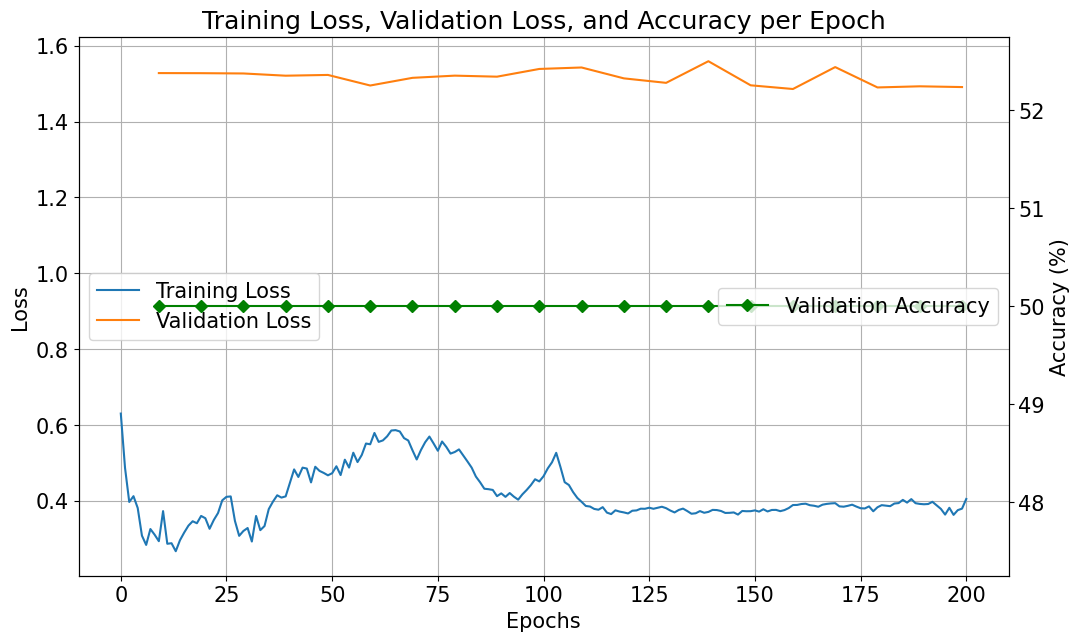

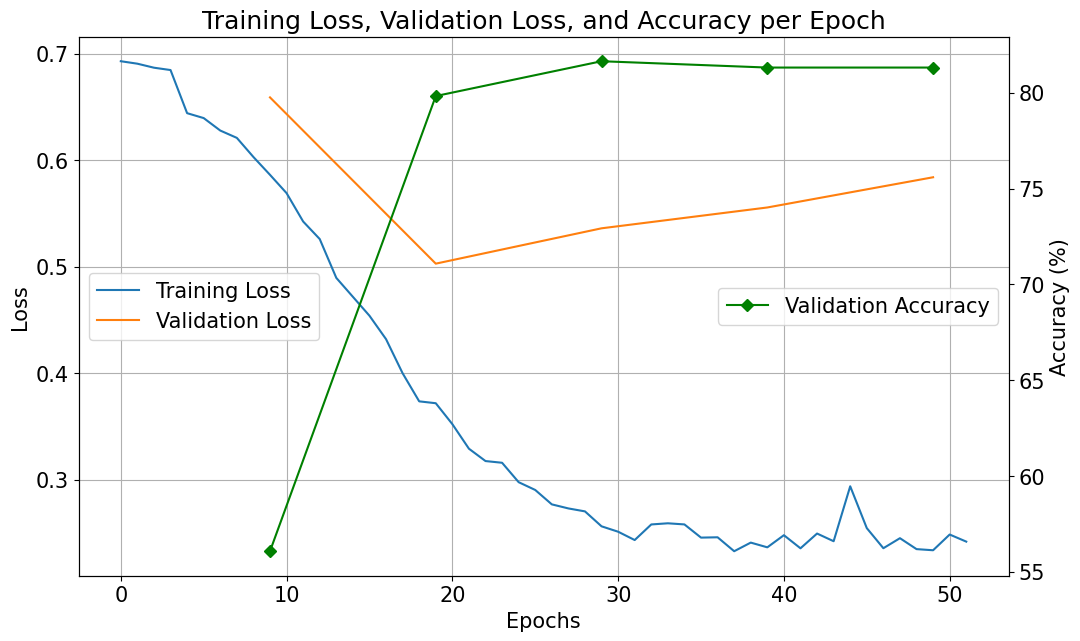

# Learning rate study

In [44]:
%load_ext autoreload
%autoreload 2

dataset_len = 600
import numpy as np
import matplotlib.pyplot as plt
from arguments import prepare_finetuning_args, Args
import utils
args = prepare_finetuning_args()

# scheduler lr e wd
total_batch_size = 32 # args.batch_size
num_training_steps_per_epoch = dataset_len// total_batch_size
print(f"num_training_steps_per_epoch  {num_training_steps_per_epoch}")
args.lr = args.lr * total_batch_size / 256
args.min_lr = args.min_lr * total_batch_size / 256
args.warmup_lr = args.warmup_lr * total_batch_size / 256
print(f"[INFO] LR scaled: {args.lr}, warmup_lr: {args.warmup_lr}, min_lr: {args.min_lr}")

lr_schedule_values = utils.cosine_scheduler(
        args.lr, args.min_lr, args.epochs, num_training_steps_per_epoch,
        warmup_epochs=args.warmup_epochs, start_warmup_value=args.warmup_lr,  warmup_steps=args.warmup_steps)
#print(f"lr_schedule_values {lr_schedule_values}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_training_steps_per_epoch  18
[INFO] LR scaled: 1.125e-05, warmup_lr: 1.25e-11, min_lr: 1.25e-06
Set warmup steps = 900


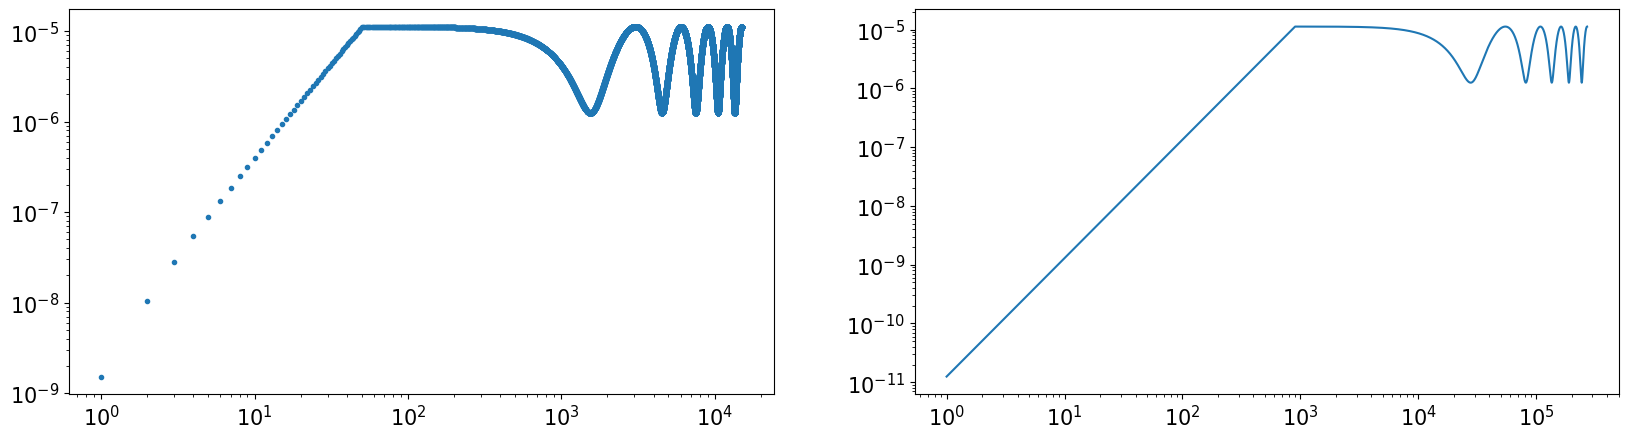

In [45]:
# da steps a epoche
lr_epochs = np.array(lr_schedule_values).reshape(args.epochs, num_training_steps_per_epoch).mean(axis=1)
fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].plot(range(1,args.epochs+1), lr_epochs, '.')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].plot(range(1, args.epochs*num_training_steps_per_epoch+1), lr_schedule_values)
ax[1].set_yscale('log')
ax[1].set_xscale('log')

In [46]:
args.epochs*num_training_steps_per_epoch, len(lr_schedule_values), lr_schedule_values

(270000,
 270000,
 array([1.25000000e-11, 5.05396907e-11, 1.14430693e-10, ...,
        1.12499997e-05, 1.12499999e-05, 1.12500000e-05]))

# Verifica training